# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

This project aims to develop a regression model to accurately predict the demand for bike sharing services. By analyzing historical data and considering various factors, I seek to provide insights that can be used to optimize bike availability, improve customer experience, and enhance operational efficiency.

The objective is to build a robust regression model that effectively predicts the number of bikes required based on key variables such as weather conditions, time of day, day of the week, and other relevant factors.

The project will follow the following methodology:

1. **Data reading**: Historical data on bike sharing services is taken as for training algorithms. Data includes weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall, etc.), the number of bikes rented per hour and date information.

2. **Data preprocessing**: The collected data will undergo thorough cleaning and preprocessing. Missing values and outliers will be handled appropriately, and feature engineering techniques will be employed to extract meaningful information that can enhance the model's performance.

3. **Model selection and training**: Various regression algorithms, such as linear regression along with L1 and L2 regularization, polynomial regression, decision trees and ensemble methods like Voting Ensemble, Random Forest, Adaboost, Gradient Boosting, XGBoost, etc. will be explored. These algorithms will be trained using the preprocessed data, and their performance will be evaluated using appropriate metrics, such as mean squared error (MSE) or root mean squared error (RMSE).

4. **Feature selection**: The project will identify the most influential features affecting bike demand. Through feature selection techniques, the most relevant variables will be chosen to refine the regression model and improve its accuracy.

5. **Model evaluation and refinement**: The trained regression model will undergo rigorous evaluation using cross-validation techniques. Fine-tuning of hyperparameters will be performed to improve the model's accuracy, robustness, and generalizability.

6. **Predictive analysis**: The final regression model, deemed the most accurate and reliable, will be deployed to make predictions on new or unseen data. This will provide real-time estimates of bike demand, facilitating effective resource planning and allocation.

Through this regression project on bike sharing demand prediction, I aim to leverage historical data and machine learning techniques to develop an accurate model that optimizes bike availability, improves customer experience, and enhances operational efficiency. The regression model developed in this project is expected to provide accurate predictions of bike demand. The project's outcomes will provide valuable insights for bike sharing service providers, ultimately benefiting both users and operators in the pursuit of a seamless and efficient bike sharing experience.

# **GitHub Link -**

https://github.com/Dheeraj-Budhlakoti/Regression_Project_Bike_Sharing_Demand_Prediction





# **Problem Statement**


**Business Context**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# for statistical tests
import scipy.stats as stats

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# to display full set of column data
pd.pandas.set_option('display.max_columns',None)

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Capstone Project Regression/SeoulBikeData.csv', encoding = "ISO-8859-1")

### Dataset First View

In [4]:
# Dataset First Look
dataset.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(f"Total Rows: {dataset.shape[0]}")
print(f"Total Columns: {dataset.shape[1]}")

Total Rows: 8760
Total Columns: 14


### Dataset Information

In [6]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
dataset.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

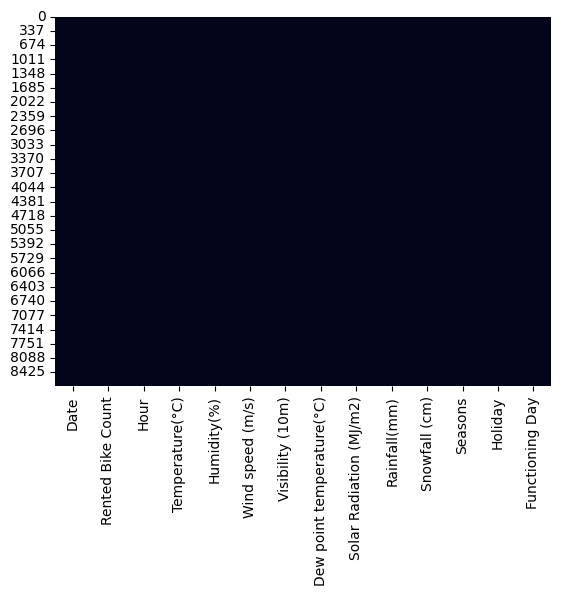

In [9]:
# Visualizing the missing values
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

* The dataset given is a historical bike sharing data and we have to analyse it and use it to for prediction of bike count required at each hour.

* Our objective is to find a way to estimate the value prediction of bike count required at each hour for the stable supply of rental bikes. If we can do so for the historical data, then we should able to estimate bike count required at each hour.

* The above dataset has 14 features with 8760 rows of data. There are no missing and duplicate values in the dataset.

* 'Rented Bike Count' is our dependent variable column and rest columns are our features.


## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# Dataset Describe
dataset.describe(include='all')

Date  Rented Bike Count         Hour  Temperature(°C)  \
count         8760        8760.000000  8760.000000      8760.000000   
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         704.602055    11.500000        12.882922   
std            NaN         644.997468     6.922582        11.944825   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1065.250000    17.250000        22.500000   
max            NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

### Variables Description 

Data Description:

* ###### Date : year-month-day
* ###### Rented Bike count - Count of bikes rented at each hour
* ###### Hour - Hour of he day (0-23)
* ###### Temperature-Temperature in Celsius
* ###### Humidity - Humidity measure (%)
* ###### Windspeed - m/s
* ###### Visibility - Visibility Measure (10m)
* ###### Dew point temperature - Dew point temperature measure (Celsius)
* ###### Solar radiation - Solar radiation measure (MJ/m2)
* ###### Rainfall - Rainfall in mm
* ###### Snowfall - Snowfall measure (cm)
* ###### Seasons - Winter, Spring, Summer, Autumn
* ###### Holiday - Holiday/No holiday
* ###### Functional Day - Whether a functional day or not

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
dataset.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

Details about data:
* There are 4 categorical columns and 10 numerical columns. Columns 'Date', 'Seasons', 'Holiday' and 'Functioning Day' are of object data type.
* Columns 'Rented Bike Count', 'Hour', 'Humidity (%)' and 'Visibility (10m)' are of int64 numerical data type.
* Columns 'Temperature (℃)', 'Wind Speed (m/s)', 'Dew Point Temperature (℃)', 'Solar Radiation (MJ/2)', 'Rainfall (mm)' and 'Snowfall(cm) are of float64 numerical data type.
* Unique count : Seasons- 4 , Holiday- 2 , Functioning Day- 2
* The numerical columns appear to be outlier free based on dataset description.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Creating a copy of dataset and assigning it to df
df=dataset.copy()

In [14]:
# Converting date column to datetime format
df['Date']=pd.to_datetime(df['Date'])

In [15]:
# Checking the years for which dataset is given
df['Date'].dt.year.value_counts()

2018    8016
2017     744
Name: Date, dtype: int64

In [16]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [17]:
# Extracting month from Date
df['Month']=df['Date'].dt.month   

# Extracting week day name from Date
df['WeekDay']=df['Date'].dt.day_name()  

# Creating weekend or not column from Weekday
df['is_weekend']=np.where(df['WeekDay'].isin(['Sunday','Saturday']),1,0) 

# Droping Date and Weekday column
df=df.drop(columns=['Date','WeekDay'])  

df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  Month  \
0           0.0            0.0  Winter  No Holiday             Yes      1   
1           0.0            0.0  Winter  No Holiday             Yes      1   
2           0.0            0.0  Winter  No Holiday             Yes      1   
3           0.0            0.0  Winter  No Holiday             Yes      1   
4           0.0            0.0  Winter  No Holiday             Yes      1   

   is_weekend  
0           0  
1           0  
2           0  
3           0  
4           0

In [18]:
numerical_features=df.describe().columns.drop(['is_weekend','Rented Bike Count','Hour','Month'])
numerical_features

Index(['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [19]:
categorical_features = list(df.describe(include=['object','category']).columns)
categorical_features.extend(['is_weekend','Hour','Month'])
categorical_features

['Seasons', 'Holiday', 'Functioning Day', 'is_weekend', 'Hour', 'Month']

### What all manipulations have you done and insights you found?

* Firstly, 'Date' column was converted from 'object' datatype to 'datetime64[ns]'. Then, two new features namely 'Month' and 'is_weekend' were created by using data in 'Date' column.

* Inspection revealed that the data came from the years 2017 and 2018, however as 2017 contained only 744 data points, adding a year feature would not have been very helpful.

* Finally, 'Date' and 'Weekday' columns were dropped and two lists containing numerical and categorical feature names were created for better analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart 1 - Dependent Variable Distribution (Univariate)

<function matplotlib.pyplot.show(close=None, block=None)>

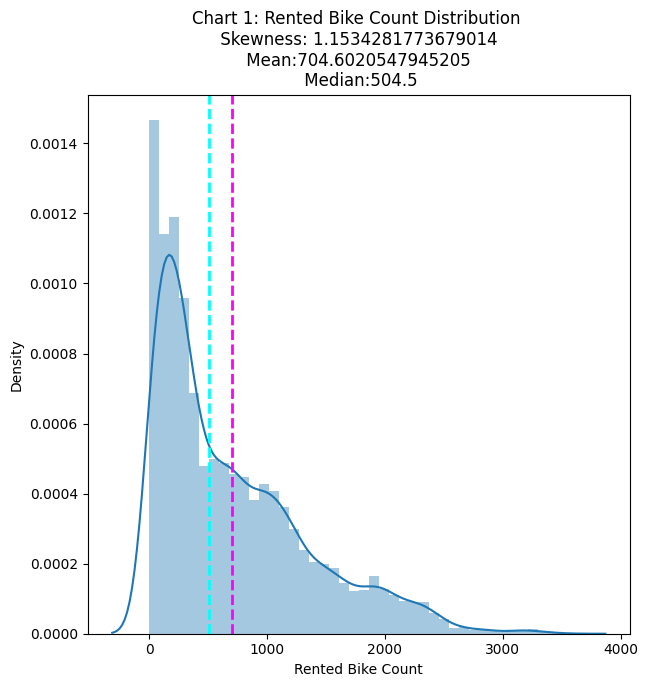

In [20]:
# Checking dependent variable distribution
plt.figure(figsize=(7,7))
ax=sns.distplot(df['Rented Bike Count'])
ax.axvline(df['Rented Bike Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented Bike Count'].median(), color='cyan', linestyle='dashed', linewidth=2)
ax.set_title(f"Chart 1: Rented Bike Count Distribution \n Skewness: {df['Rented Bike Count'].skew()} \n Mean:{df['Rented Bike Count'].mean()} \n Median:{df['Rented Bike Count'].median()}")
plt.show

##### 1. Why did you pick the specific chart?

* We used distplot from seaborn library here because we wanted to see the distribution of our dependent variable.

##### 2. What is/are the insight(s) found from the chart?

* The dependent variable is positively skewed with skewness value of +1.15, so for better performane of our linear models we might need to use function transformation.
* The average rented bikes per hour is 704 and the median is 504.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The positively skewed distribution of the number of rented bikes indicates that there are relatively few instances where a large number of bikes are rented, while most instances involve a smaller number of rentals. 
* This skewness suggests that there may be occasional periods of high demand for bikes, leading to a few spikes in rental activity. By finding features that are responsible for those high values from historical data future inventory needs can be forcast more accurately.
* This insight enables better planning for inventory replenishment and maintenance activities, ensuring that bikes are well-maintained and available during periods of high demand.
* As most of the customer value convenience and availability during peak demand periods. This information can be used to evaluate pricing strategies, such as implementing surge pricing during high-demand periods. By adjusting prices based on demand patterns, you can capture additional revenue during peak times while maintaining competitive pricing during periods of lower demand.

#### Charts 2 to 9 - Numerical Features Distribution (Univariate)

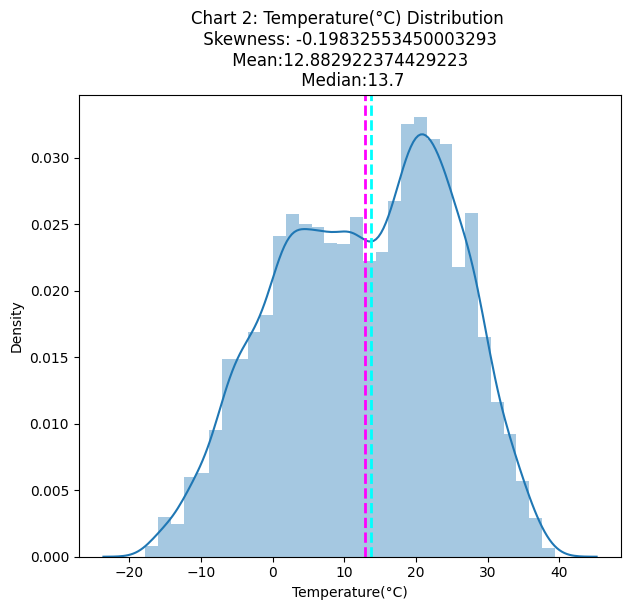

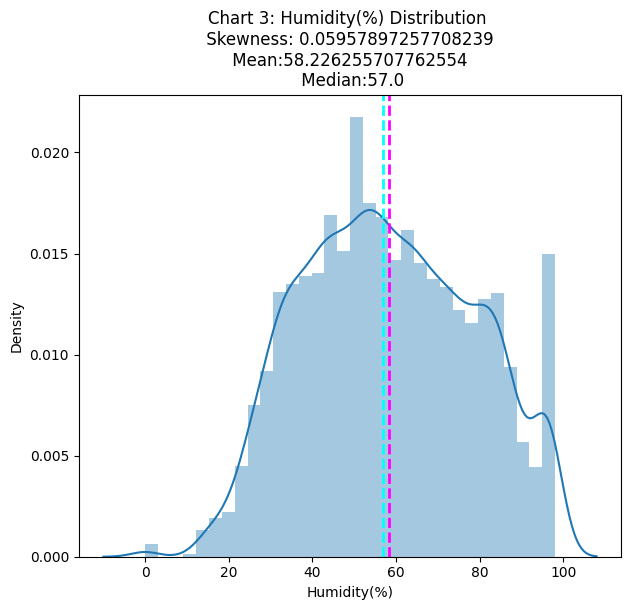

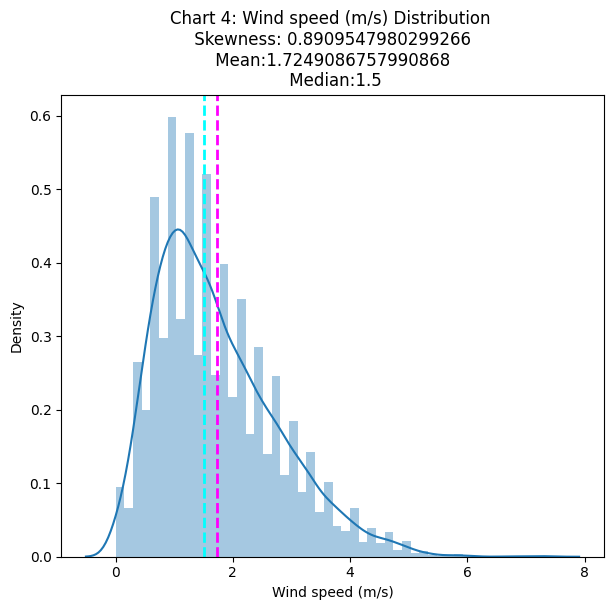

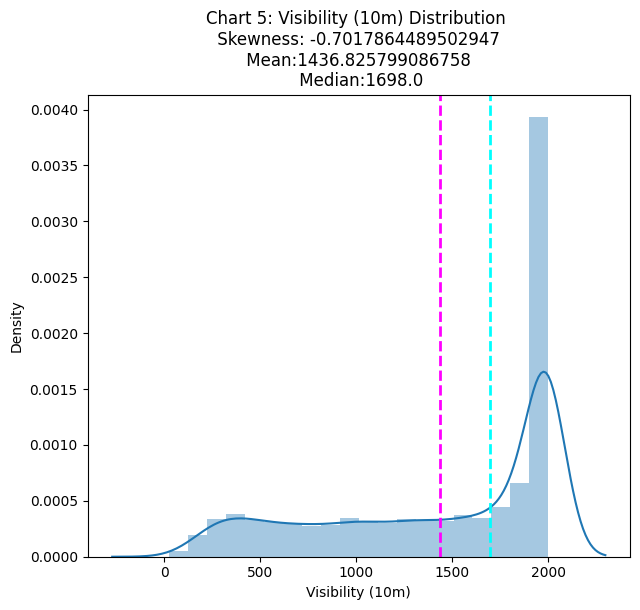

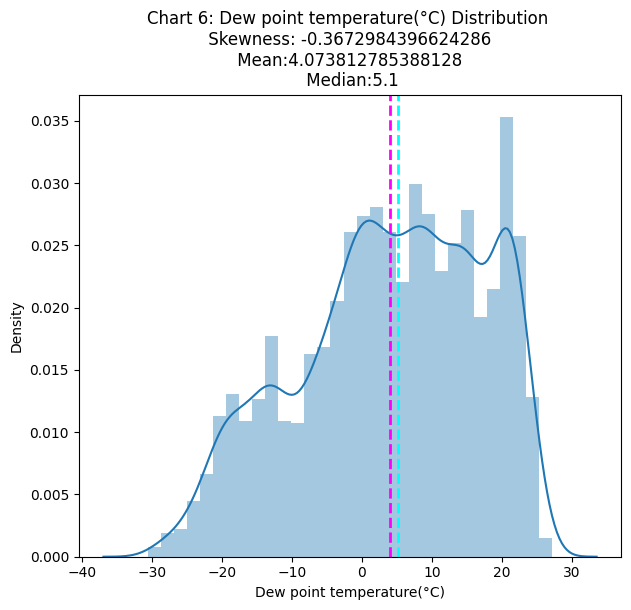

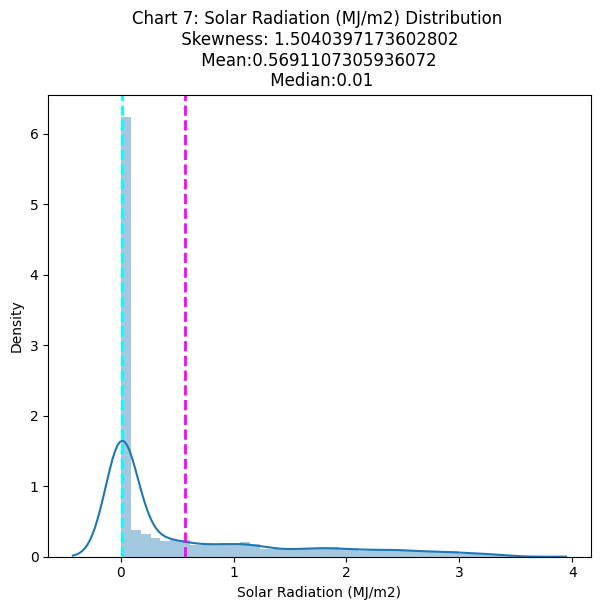

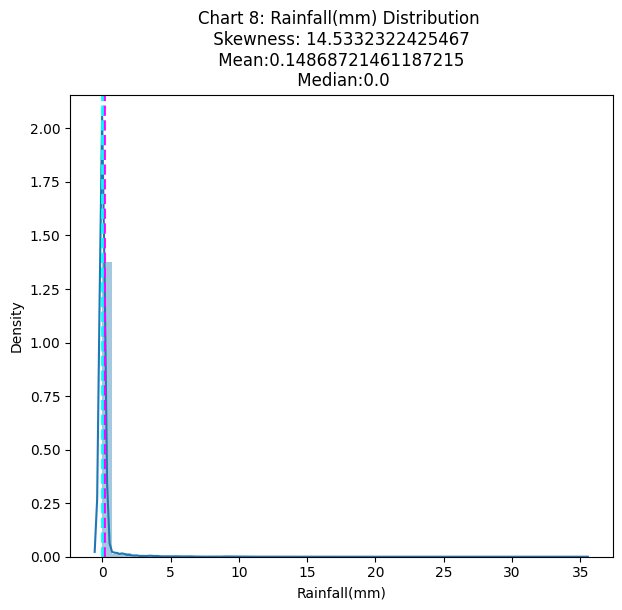

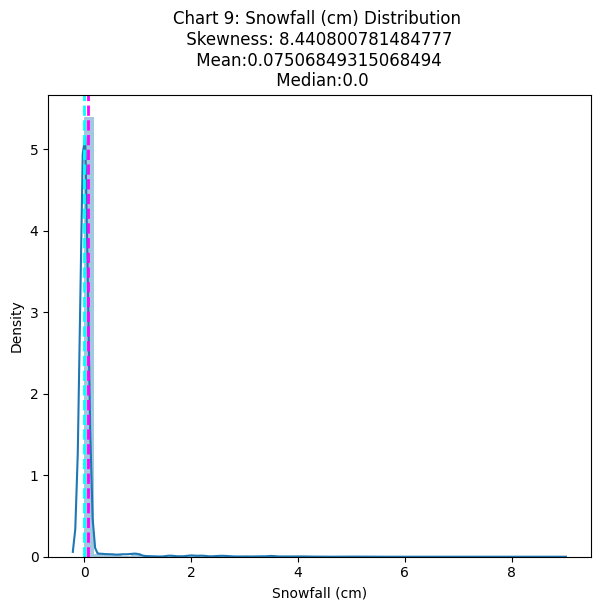

In [21]:
# Loop to plot distribution graphs of our numerical features
chart_num=2
for col in numerical_features:
  plt.figure(figsize=(7,6))
  ax=sns.distplot(df[col])
  ax.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(f"Chart {chart_num}: {col} Distribution \n Skewness: {df[col].skew()} \n Mean:{df[col].mean()} \n Median:{df[col].median()}")
  chart_num+=1
plt.show()

In [22]:
df['Solar Radiation (MJ/m2)'].value_counts()

0.00    4300
0.01     128
0.02      82
0.03      69
0.06      61
        ... 
3.38       1
2.97       1
3.44       1
3.49       1
3.45       1
Name: Solar Radiation (MJ/m2), Length: 345, dtype: int64

In [23]:
df['Rainfall(mm)'].value_counts()

0.0     8232
0.5      116
1.0       66
1.5       56
0.1       46
        ... 
1.9        1
3.3        1
17.0       1
1.4        1
1.8        1
Name: Rainfall(mm), Length: 61, dtype: int64

In [24]:
df['Snowfall (cm)'].value_counts()

0.0    8317
0.3      42
1.0      39
0.9      34
0.5      34
0.7      31
0.8      22
2.0      22
0.4      21
1.6      19
2.2      18
0.2      15
0.6      15
3.5      14
2.6      12
2.5      10
1.2       8
2.7       6
1.8       5
3.0       5
4.0       4
4.1       4
3.2       4
1.3       4
3.7       3
3.3       3
1.1       3
3.8       3
2.3       3
2.1       3
1.9       3
1.7       3
2.4       3
3.4       2
8.8       2
2.8       2
2.9       2
0.1       2
5.0       2
4.8       2
1.4       2
3.9       2
4.3       2
5.1       1
1.5       1
3.1       1
7.1       1
7.0       1
6.0       1
3.6       1
4.2       1
Name: Snowfall (cm), dtype: int64

##### 1. Why did you pick the specific chart?

* Distplots from sns library has been used here again to see the distribution of numerical features.

##### 2. What is/are the insight(s) found from the chart?

* The feature 'Temperature' and 'Humidity' follow close to normal distributions.
* The feature 'Wind Speed' and 'Dew Point Temperature' are slightly positive and negative skewed respectively.
* The features 'Visibility', 'Solar Radiation', 'Rainfall' and 'Snowfall' are highly skewed variables.
* The high positive skewness in 'Solar Radiation', 'Rainfall' and 'Snowfall' are justified as most of the time there values are very very low almost 0, and these values increase occasionaly.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


* The gained insights from the distributions of these variables can help create a positive business impact. 
* Understanding the normal distributions of 'Temperature' and 'Humidity' enables businesses to make informed decisions related to resource allocation and customer comfort. 
* However, if poorly managed, highly skewed variables like "Visibility," "Solar Radiation," "Rainfall," and "Snowfall" might result in poor growth. Neglecting low visibility situations could have an effect on consumer satisfaction and safety. Inadequate planning for strong sun radiation, heavy rain, or snowfall can cause operations to be disrupted, infrastructure to be damaged, and customers to become disgruntled. 
* Maintaining positive growth and client loyalty requires mitigating these risks through backup plans, safety precautions, and operational changes.

#### Chart 10 to 15 - Categorical Features Distribution (Univariate)

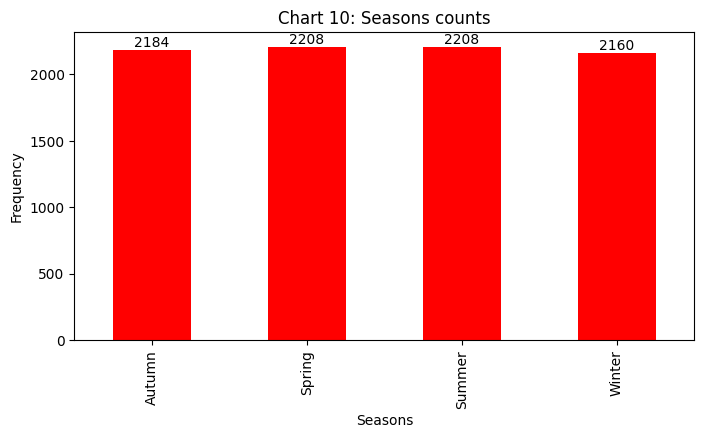

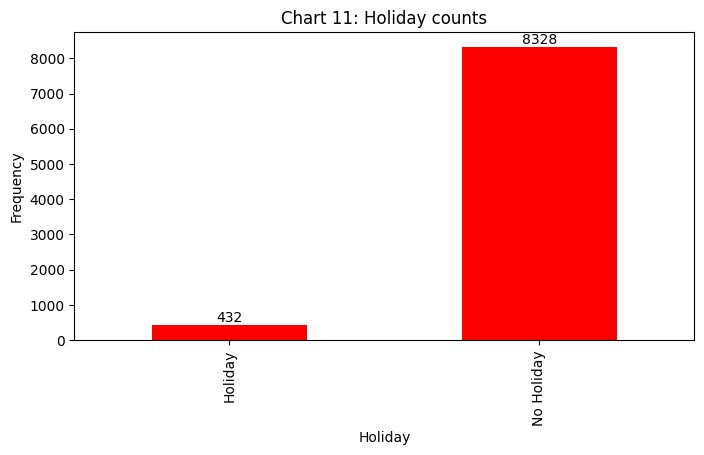

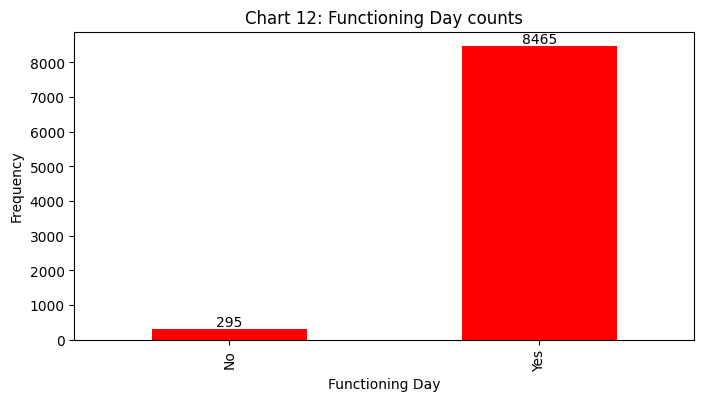

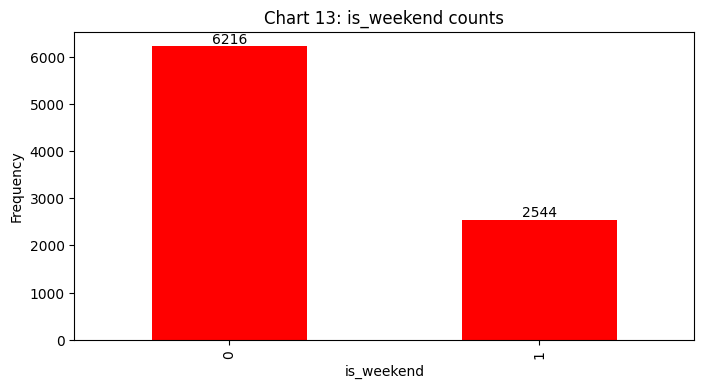

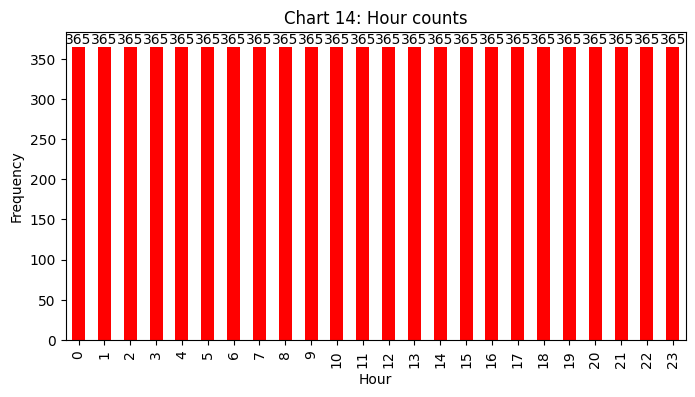

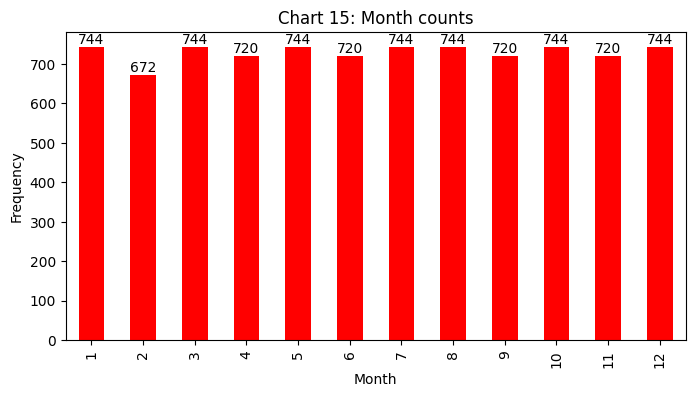

In [25]:
# plot a bar plot for each categorical feature count  
Chart_num=10
for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(8, 4))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='red')
    ax.set_title(f'Chart {Chart_num}: {col} counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
    for container in ax.containers:
      ax.bar_label(container)
    Chart_num+=1
plt.show()

##### 1. Why did you pick the specific chart?

* Simple bar plot is used here to visualize value_counts of different categorical features.

##### 2. What is/are the insight(s) found from the chart?

* The month, hour and season features have balanced data points for each of their sub-categories.
* Most of the data is from days which are functioning days and when there are no holidays.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* When analysed in relation to the number of rented bikes, these features can assist businesses in forecasting, optimising, and making defensible choices regarding resource allocation and client comfort. For instance, developing better pricing strategies depending on the busiest times of day or on the weekdays or weekends can have a significant positive impact on business.

#### Chart 16 to 23 - Multivariate Analysis b/w Dependent Variable and numerical features

In [26]:
# Checking correlation of Dependent Variable with different features
df.corr()['Rented Bike Count']

Rented Bike Count            1.000000
Hour                         0.410257
Temperature(°C)              0.538558
Humidity(%)                 -0.199780
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Month                        0.070861
is_weekend                  -0.032259
Name: Rented Bike Count, dtype: float64

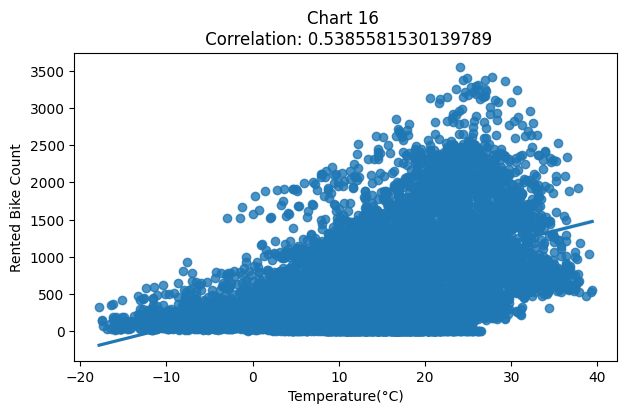

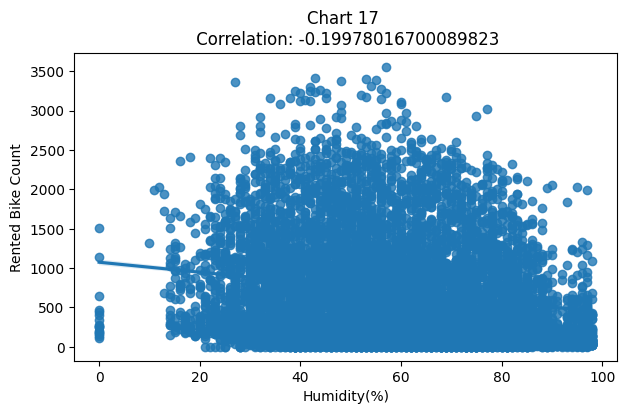

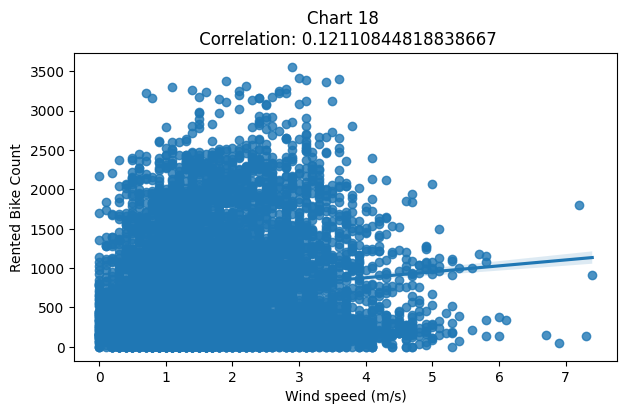

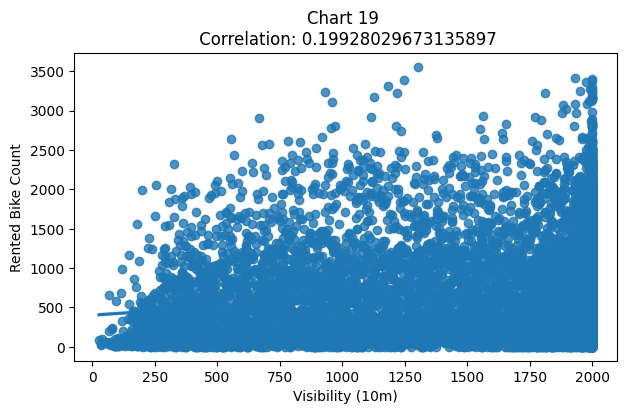

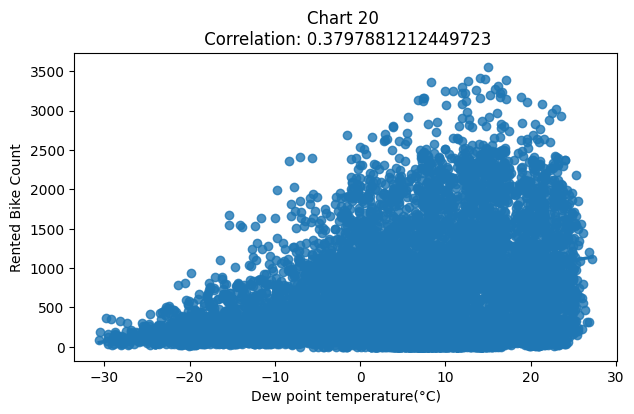

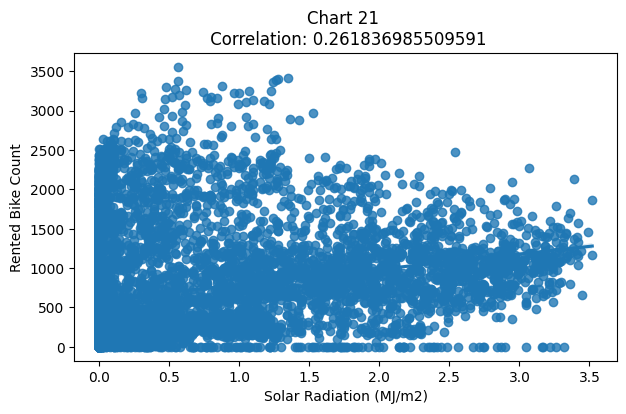

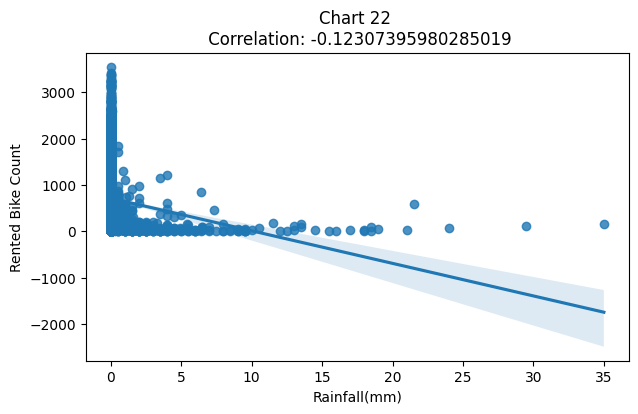

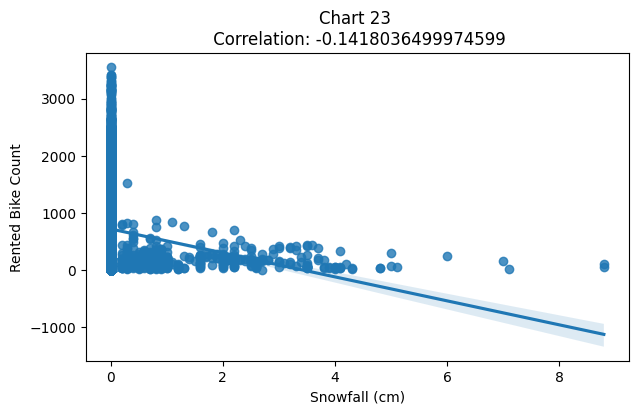

In [27]:
# plotting regression plot
chart_num=16
for col in numerical_features:
  plt.figure(figsize=(7,4))
  sns.regplot(x=df[col],y=df['Rented Bike Count'])
  plt.title(f"Chart {chart_num} \n Correlation: {df['Rented Bike Count'].corr(df[col])}")
  plt.xlabel(col)
  plt.ylabel('Rented Bike Count')
  plt.show()
  chart_num+=1

##### 1. Why did you pick the specific chart?

Regplot from seaborn library has been used here to visualize how these numerical features are correlated with Bike Rental Count.

##### 2. What is/are the insight(s) found from the chart?

* Bike Rental count is positively correlated with Temperature with correlation value of 0.5385 and there are several possible reasons why temperature might be highly correlated with bike rental count one of them might be that temperature is often closely linked to the seasons. People tend to engage in outdoor activities, including bike riding, more frequently during warmer seasons such as spring and summer. As temperatures rise, individuals are more inclined to enjoy outdoor recreational activities, leading to an increased demand for bike rentals.

* Bike Rental count is slight negatively correlated with Humidity. One explanation for this can be that those who are not acclimated to or prefer drier climes may feel generally uneasy due to humidity. The decision to rent a bike may be influenced by this feeling of discomfort, which could explain the slight negative correlation.

* Wind speed and visibility are both very little positively correlated with Bike Rental Count which is justified as moderate wind speed and good visibility are ideal conditions for outdoor activities such as, biking.

* Solar Radiation and Dew Point Temperature are also slight positively correlated with Bike Rental Count.

* Finally, snowfall and rainfall are negatively correlated with Bike Rental Count which is self-evident.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The gained insights regarding the correlations between weather variables and bike rental count can help create a positive business impact. Understanding that bike rental count is positively correlated with temperature, wind speed, visibility, solar radiation, and dew point temperature allows businesses to tailor their operations and marketing efforts to maximize revenue during peak demand periods and promote biking as an enjoyable outdoor activity.

* However, there are challenges to consider. The slight negative correlation between humidity and bike rental count suggests that high humidity levels may discourage rentals. Additionally, bike rental businesses may experience reduced demand during periods of significant snowfall or heavy rain. Overcoming these challenges may require adapting services or offering alternative activities during inclement weather.

* Overall, by leveraging these insights, bike rental companies can capitalize on favorable weather conditions and mitigate challenges, ultimately driving positive growth and customer satisfaction.

#### Chart 24 to 35 - Multivariate Analysis b/w Dependent Variable and categorical features

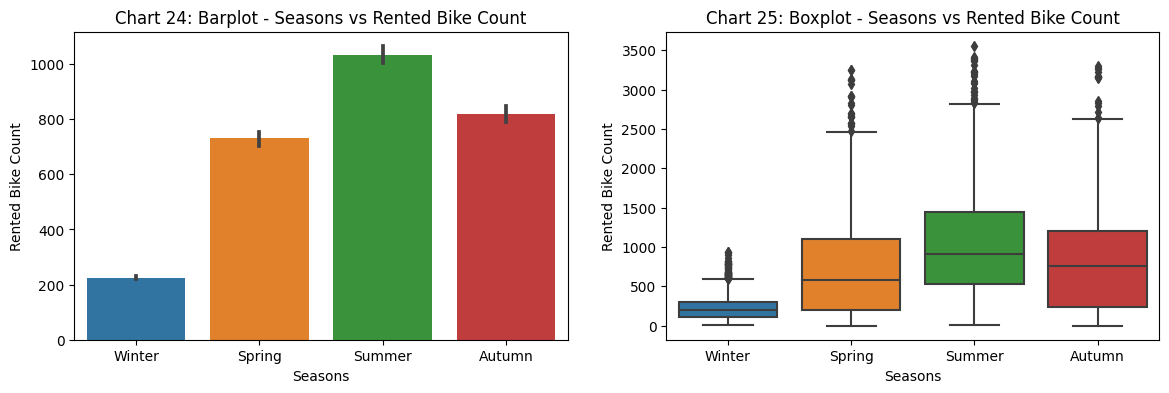

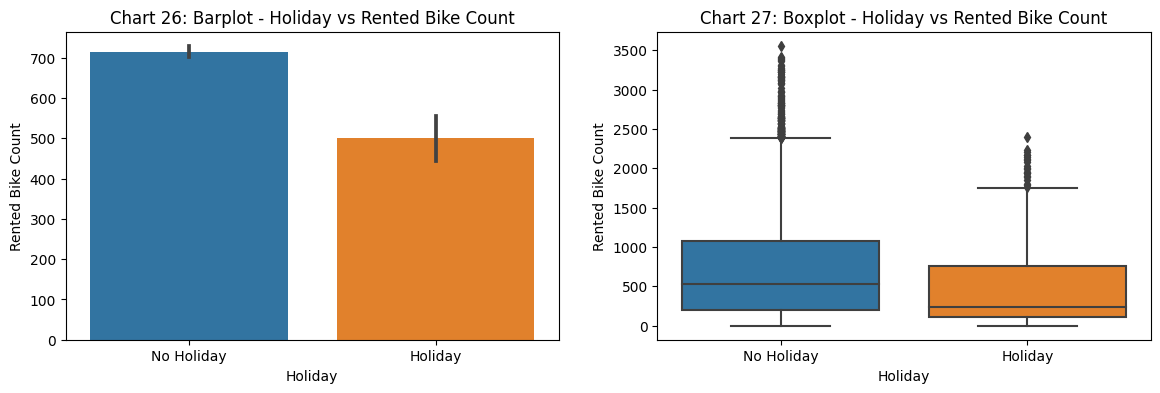

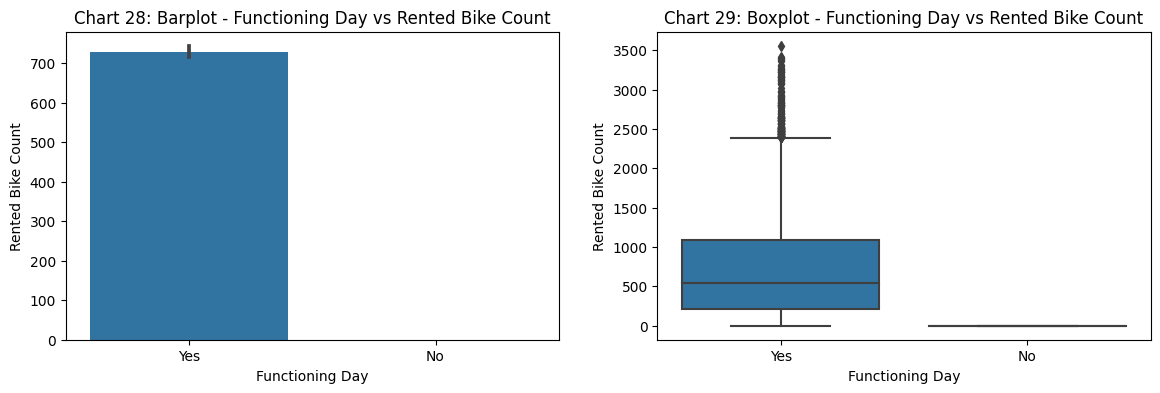

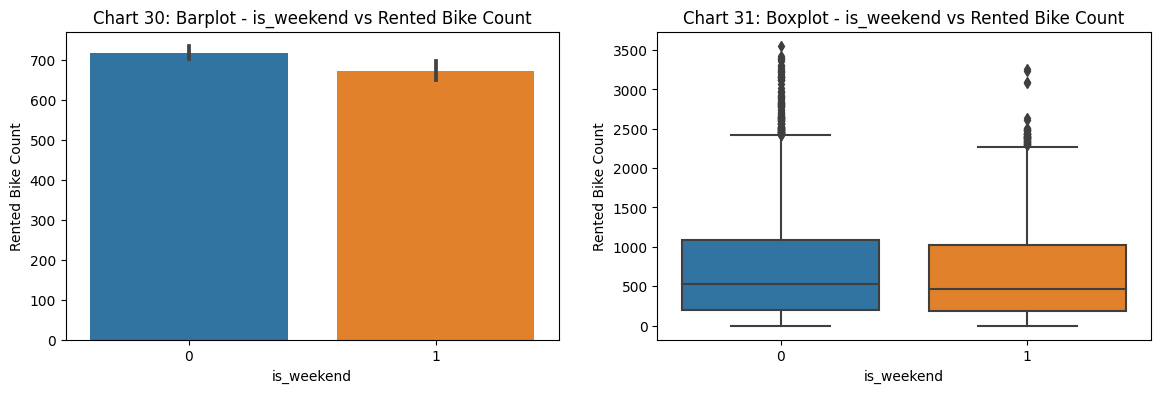

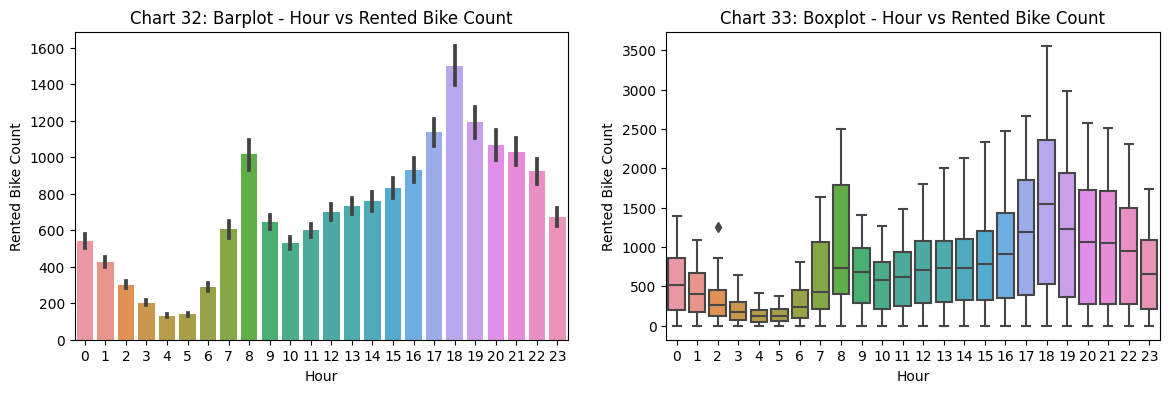

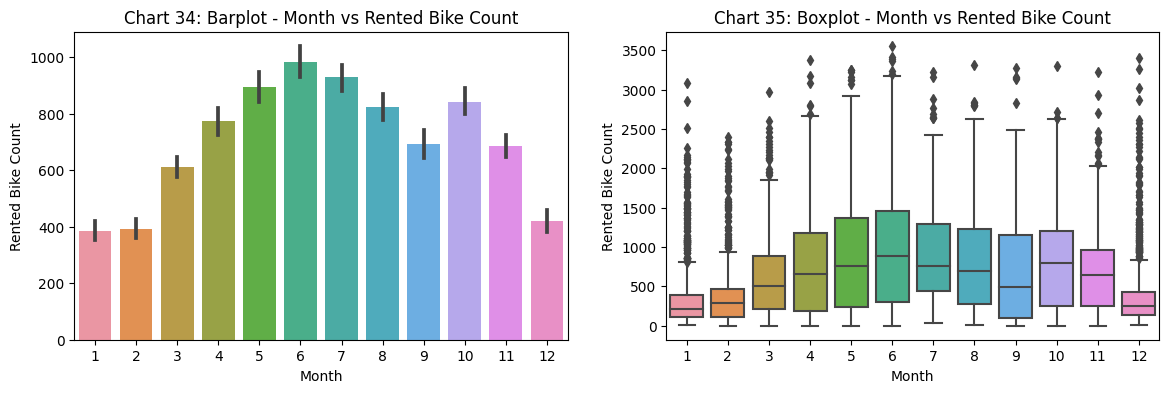

In [28]:
# plotting barplot and boxplot between Dependent Variable and categorical features
Chart_num=24
for col in categorical_features:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.barplot(x=df[col],y=df['Rented Bike Count'])
  plt.title(f'Chart {Chart_num}: Barplot - {col} vs Rented Bike Count')

  Chart_num+=1
  plt.subplot(122)
  sns.boxplot(x=df[col],y=df['Rented Bike Count'])
  plt.title(f'Chart {Chart_num}: Boxplot - {col} vs Rented Bike Count')
  Chart_num+=1

  plt.show()

In [29]:
df.groupby('Functioning Day')['Rented Bike Count'].sum()

Functioning Day
No           0
Yes    6172314
Name: Rented Bike Count, dtype: int64

In [30]:
# Removing non functional day rows as bike rentals were 0
df=df.drop(df[df['Functioning Day'] == 'No'].index) 

In [31]:
# Droping Functioning Day Column
df=df.drop(['Functioning Day'], axis = 1)
categorical_features.remove('Functioning Day')

In [32]:
df.groupby('is_weekend')['Rented Bike Count'].mean()

is_weekend
0    740.794157
1    700.438345
Name: Rented Bike Count, dtype: float64

In [33]:
df2=dataset.copy()

In [34]:
df2['Date']=pd.to_datetime(df2['Date'])
df2['WeekDay']=df2['Date'].dt.day_name()

<Axes: xlabel='WeekDay', ylabel='Rented Bike Count'>

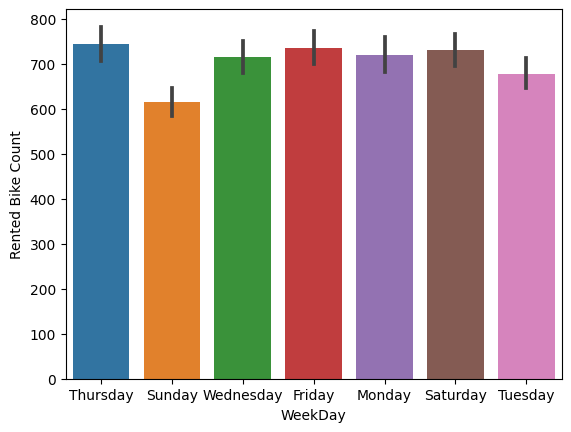

In [35]:
# Week Days comparison with rented bike count
sns.barplot(x=df2['WeekDay'],y=df2['Rented Bike Count'])

##### 1. Why did you pick the specific chart?

* Barplots and Boxplots have been used here to visualize how the rented bikes vary based on different sub-categories of our categorical features.

##### 2. What is/are the insight(s) found from the chart?

* In chart no. 24, 25 (*Seasons vs Rented Bike Count*) and 34, 35 (*Months vs Rented Bike Count*) we can see that rented bike counts are highest during summer months, followed by autumn, spring and winter respectively, which can be attributed to favorable weather conditions, increased leisure time, tourism, seasonal events, and the limitations imposed by winter weather.

* Rented bike counts are slightly more on non holiday days as compared to holidays one possible reason for this could be that holidays often involve travel and vacations, with people leaving their local area or city for leisure or family visits. This can result in a decrease in the number of people available to rent bikes in the local area during holidays.

* As per charts 28, 29 and also by further investigation, it was found that rental bikes were only given on Functioning Days, so I removed non-functioning days and then removed the functioning day column also.

* Rented bikes are almost same if not slightly lower on weekends especially on Sundays as compared to weekdays.

* Rented bikes counts are high during peak hours.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* These gained insights can indeed help create a positive business impact for bike rental companies. Understanding the patterns and preferences of customers allows businesses to optimize their operations, such as adjusting inventory levels, staffing, and marketing efforts, to meet the demand during peak periods. By aligning their resources with customer preferences, businesses can enhance customer satisfaction and increase revenue.

* However, the insight that rented bikes are slightly lower on weekends compared to weekdays could be a potential challenge. Bike rental companies should carefully analyze the reasons behind this trend and consider strategies to attract more customers on weekends, such as offering special promotions, organizing weekend-specific events, or targeting different customer segments.

* Overall, by leveraging these insights and addressing potential challenges, bike rental companies can make informed decisions to create a positive business impact and maximize their growth potential.

#### Chart 36 - Correlation Heatmap

<Axes: >

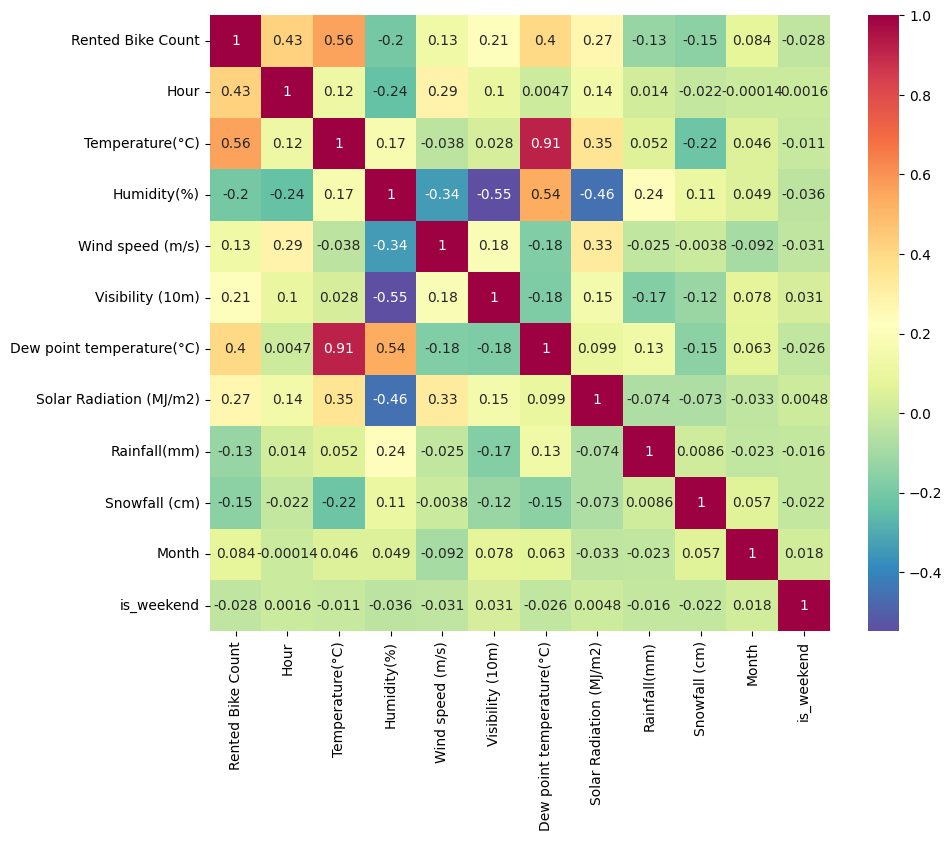

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='Spectral_r')

##### 1. Why did you pick the specific chart?

* A table displaying correlation coefficients between variables is called a correlation matrix. The correlation between two variables is displayed in each cell of the table. Data are summarised using correlation matrices, which are also used as inputs for more sophisticated studies and as diagnostics for such analyses. The correlation's range is [-1,1].

* Therefore a correlation heatmap is used here to determine the correlation between all the variables as well as the correlation coefficients.

##### 2. What is/are the insight(s) found from the chart?

* There is very high positive corelation (0.91) between Temperature and Due Point Temperature which might create mulitcollinearity problem.
* Humidity is negatively correlated with many variables like Solar Radiation, Visibility, Wind Speed.
* Dependent variable Rented Bike Count is positively correlated with features Temperature and Hour.
* Rest all correlation can be depicted from the above chart.

#### Chart 37 - Pair Plot 

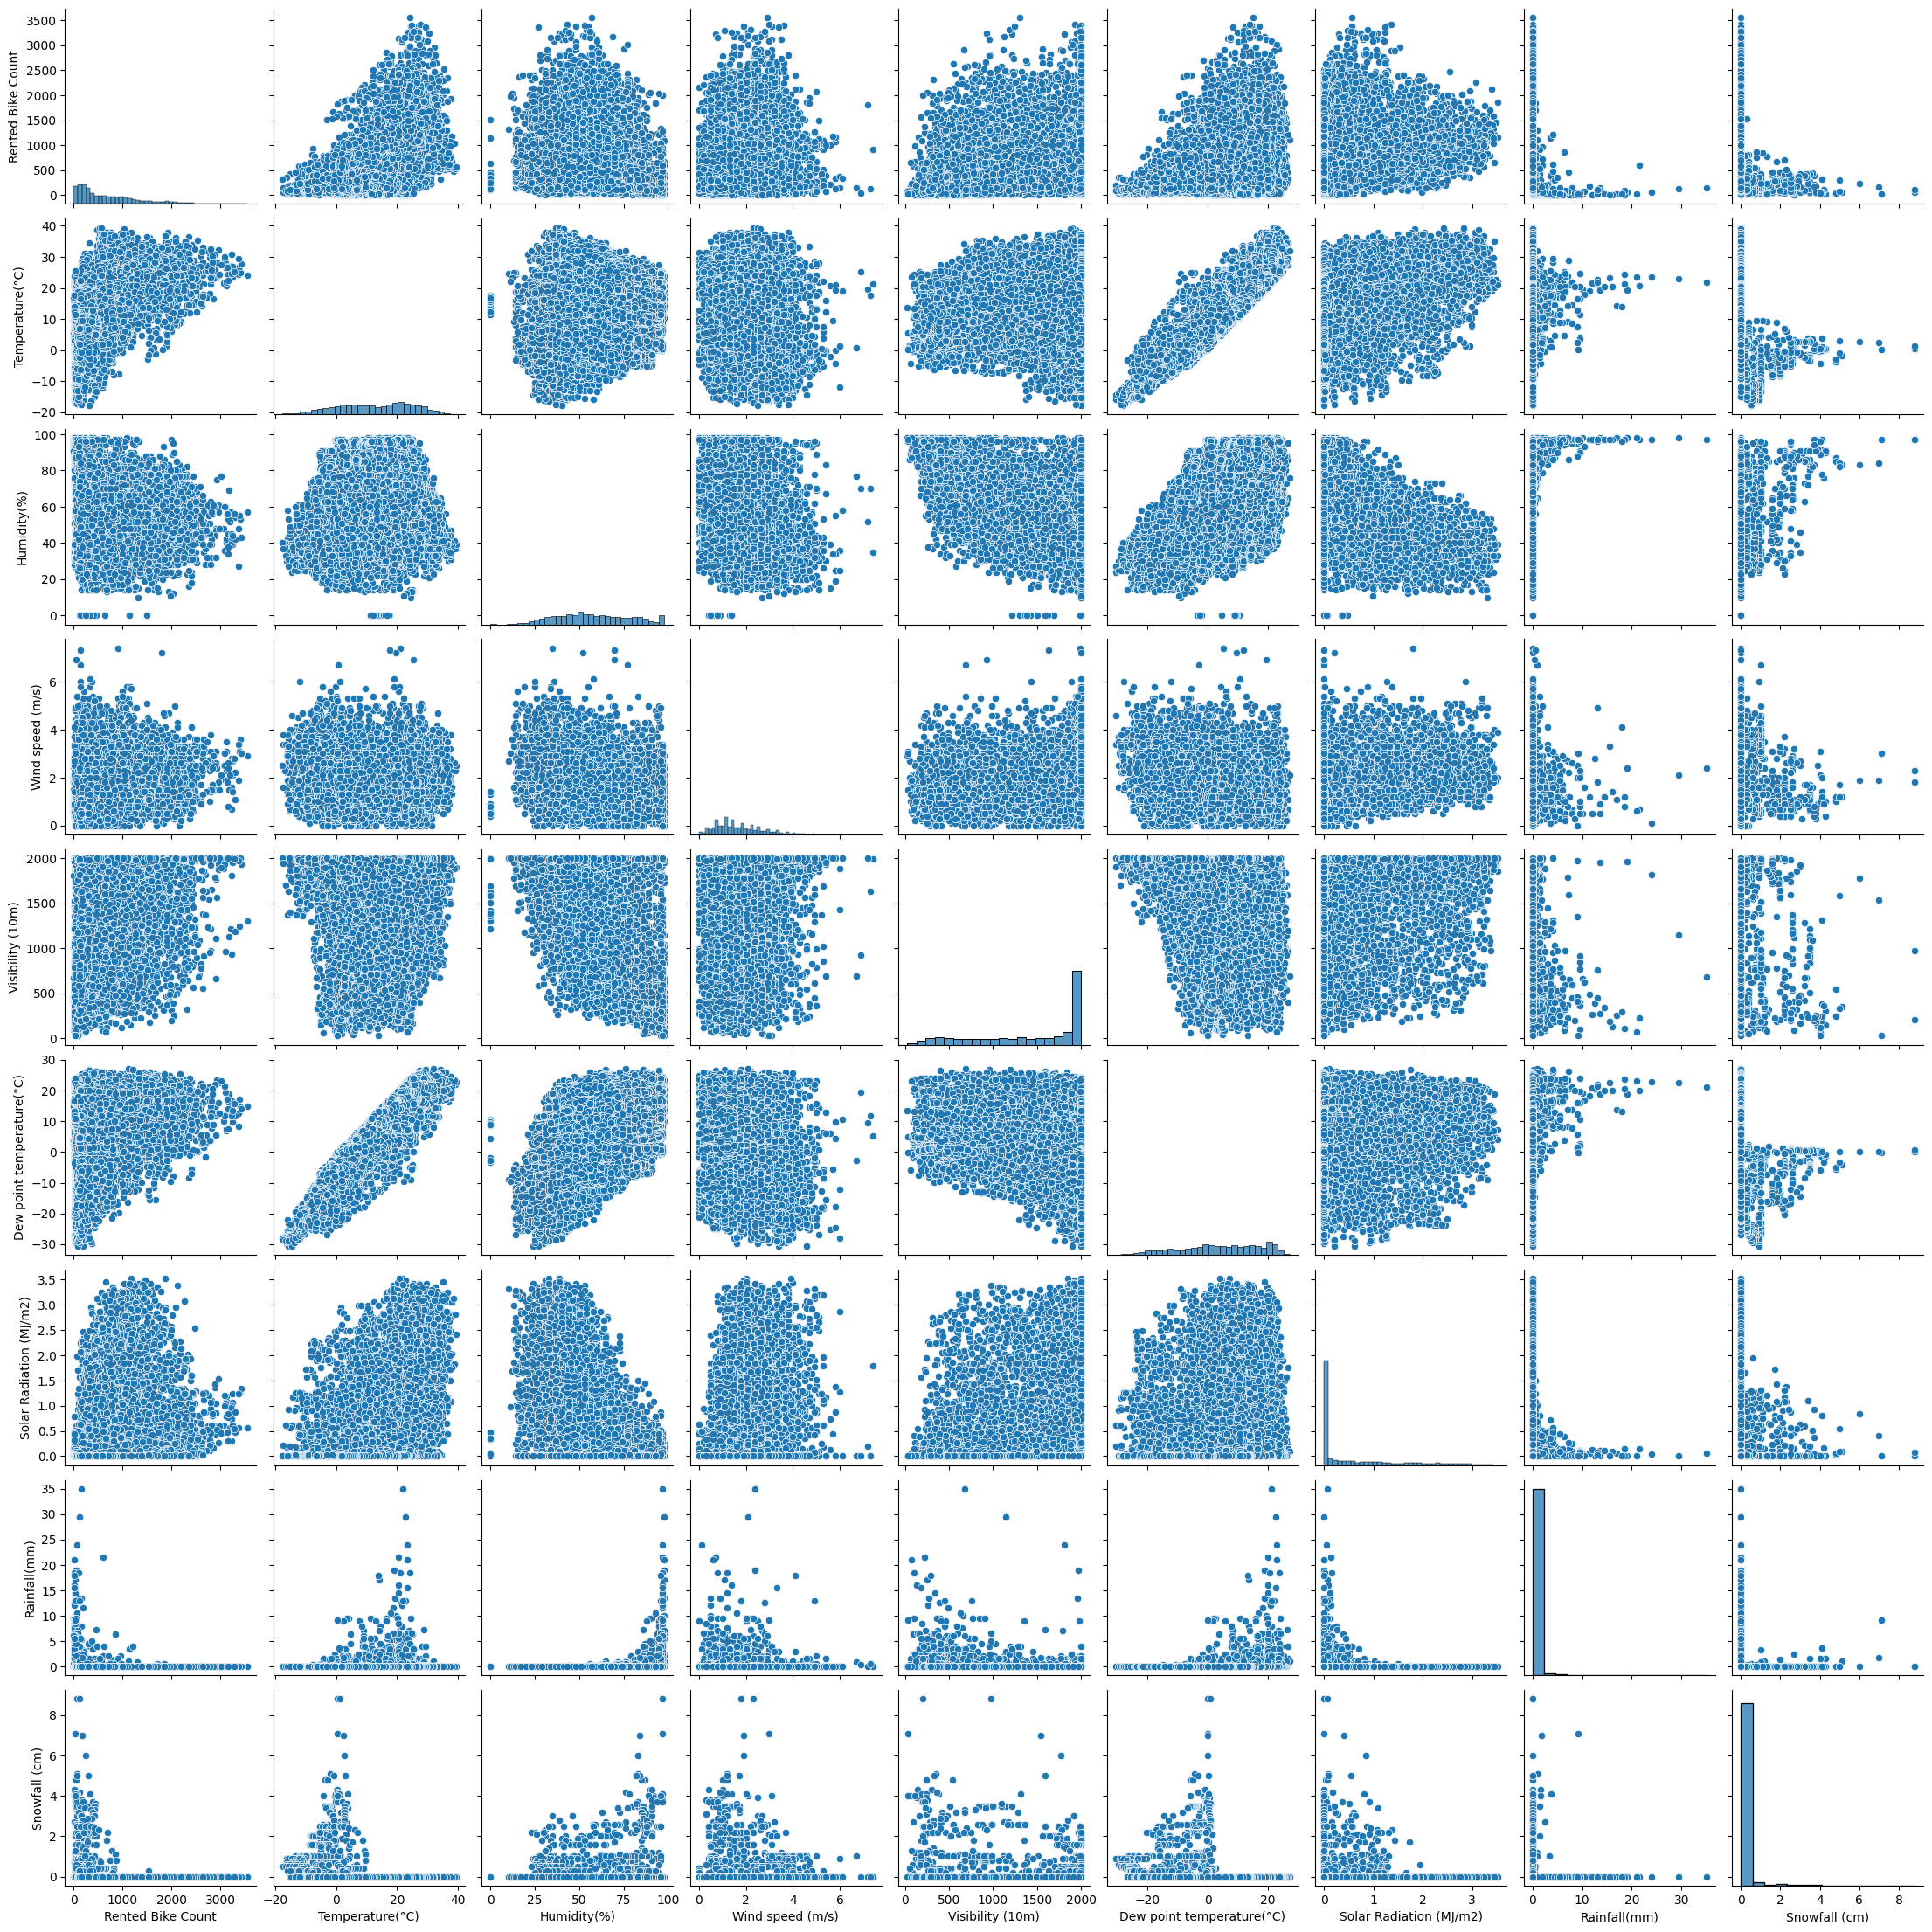

In [37]:
sns.pairplot(df.drop(categorical_features,axis=1))

##### 1. Why did you pick the specific chart?

Pair plot is used here to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From the above chart it can be seen, there are less linear relationship between variables and data points aren't linearly separable so linear regression algorithms might not work well here.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis 1: The demand for bike sharing services is positively correlated with temperature as warmer weather conditions are expected to increase the demand for bike rentals.

Hypothesis 2: The demand for bike sharing services varies significantly across different seasons.

Hypothesis 3: The distribution of bike rental demand follows a normal distribution

In [38]:
# Function to give conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Test Type: Pearson correlation test

* Null Hypothesis: r(Pearson correlation coefficient) = 0

* Alternate Hypothesis : r > 0



#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value

corr_coeff, p_value = stats.pearsonr(df['Rented Bike Count'], df['Temperature(°C)'])

# Print the chi-square statistic and p-value
print("corr_coeff:", corr_coeff)
print("P-value:", p_value)
print(conclusion(p_value))

corr_coeff: 0.5627401718632261
P-value: 0.0
Null Hypothesis rejected Successfully for p = 0.0


In [40]:
corr_coeff

0.5627401718632261

*  P value of 0.0 indicates a statistically significant correlation with corr_coeff=0.5385581530139791.

##### Which statistical test have you done to obtain P-Value?

* I have done Pearson correlation test here to test my hypothesis.

##### Why did you choose the specific statistical test?

* I picked the pearson correlation test here to test whether there is a correlation between Bike Rental Count and Temperature because it is a widely used statistical method to measure the strength and direction of the linear relationship between two continuous variables.


### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Test: Chi-square test of independence.
* Null hypothesis (H0): There is no association between the demand for bike rentals and the season (e.g., spring, summer, fall, winter).
* Alternative hypothesis (Ha): There is an association between the demand for bike rentals and the season.

#### 2. Perform an appropriate statistical test.

In [41]:
df['Seasons'].value_counts()

Summer    2208
Winter    2160
Spring    2160
Autumn    1937
Name: Seasons, dtype: int64

In [42]:
df.shape

(8465, 14)

In [43]:
# Perform Statistical Test to obtain P-Value

spring_demand = df[df['Seasons']=='Spring']['Rented Bike Count'].tolist()  # Bike rental demand in spring
summer_demand = df[df['Seasons']=='Winter']['Rented Bike Count'].tolist()  # Bike rental demand in summer
fall_demand = df[df['Seasons']=='Spring']['Rented Bike Count'].tolist()  # Bike rental demand in fall
winter_demand = df[df['Seasons']=='Spring']['Rented Bike Count'].tolist()  # Bike rental demand in winter

# Perform chi-square test of independence
observed = np.array([spring_demand, summer_demand, fall_demand, winter_demand])
chi2, p_value, _, _ = stats.chi2_contingency(observed)

# Print the chi-square statistic and p-value
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print(conclusion(p_value))

Chi-square statistic: 527726.9154626721
P-value: 0.0
Null Hypothesis rejected Successfully for p = 0.0


* Null Hypothesis was rejected Successfully which means there is an association between the demand for bike rentals and the season.

##### Which statistical test have you done to obtain P-Value?

* Chi-square test of independence

##### Why did you choose the specific statistical test?

* I have choosen Chi-square test of independence of variables in a contingency table as it computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table observed.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Test: Z-test for normality.
* Null hypothesis (H0): The distribution of bike rental demand follows a normal distribution.
* Alternative hypothesis (Ha): The distribution of bike rental demand does not follow a normal distribution.

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value

demand = df['Rented Bike Count'].tolist()  # Bike rental demand

# Perform z-test for normality
z_statistic, p_value = stats.normaltest(demand)

# Print the z-statistic and p-value
print("Z-statistic:", z_statistic)
print("P-value:", p_value)
print(conclusion(p_value))

Z-statistic: 1339.8474060639514
P-value: 1.1371885467443365e-291
Null Hypothesis rejected Successfully for p = 1.1371885467443365e-291


* Null Hypothesis rejected Successfully which means the distribution of bike rental demand does not follow a normal distribution

##### Which statistical test have you done to obtain P-Value?

Z-test for normality

##### Why did you choose the specific statistical test?

* I chose the Z-test for normality to test Hypothesis 3 (The distribution of bike rental demand follows a normal distribution) because it specifically focuses on assessing the normality of a distribution. 

* The Z-test for normality is a statistical test used to determine whether a given dataset follows a normal distribution. It is based on comparing the sample data to the expected values under a normal distribution assumption.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Month                        0
is_weekend                   0
dtype: int64


<Axes: >

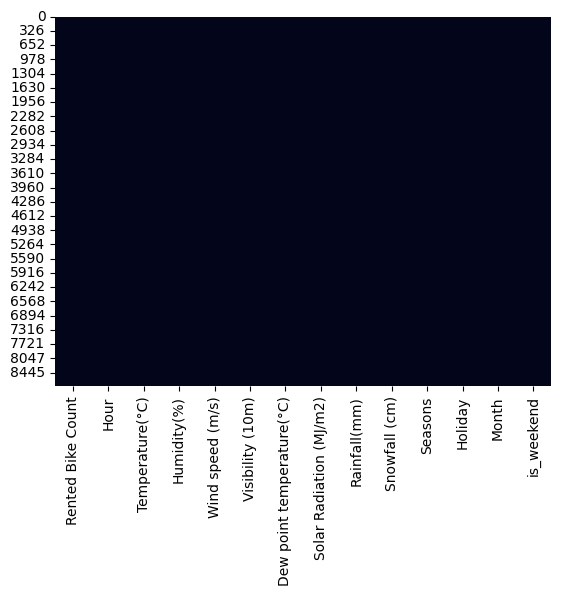

In [45]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values to handle in the given dataset.

### 2. Handling Outliers

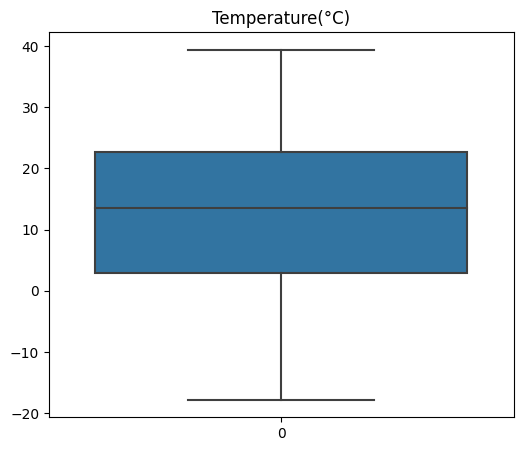

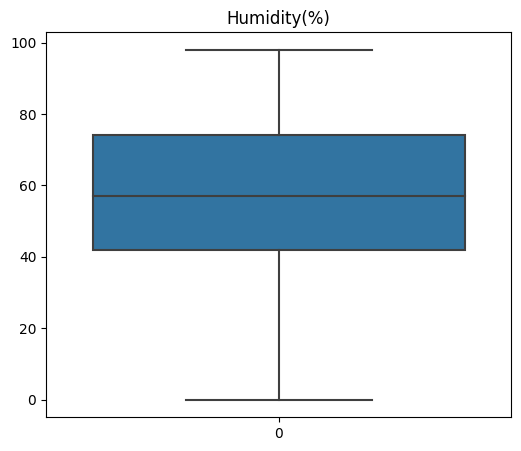

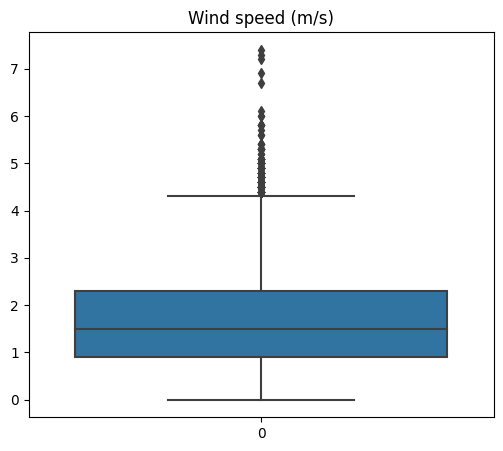

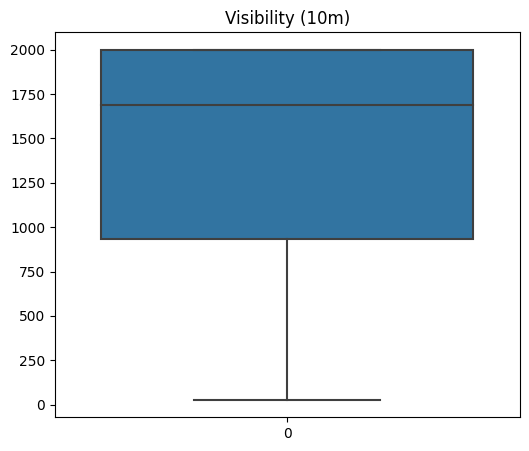

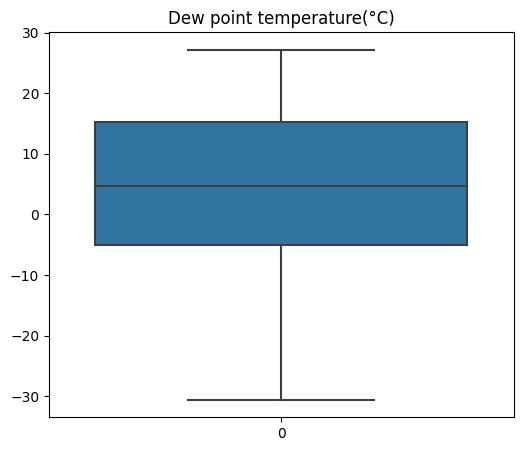

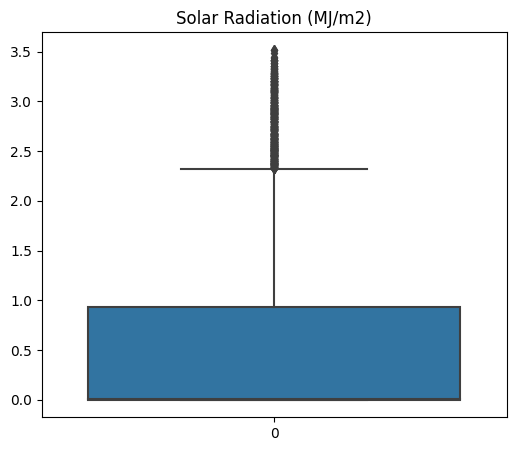

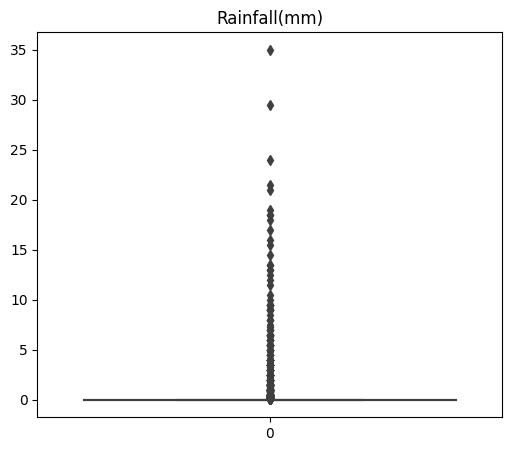

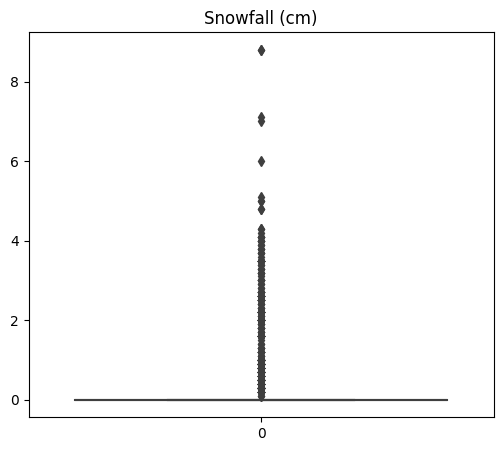

In [46]:
for col in numerical_features:
  plt.figure(figsize=(6,5))
  ax=sns.boxplot(df[col])
  ax.set_title(col)
  plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

I didn't perform any outlier treatment here because according to me the extreme points were not that large to be considered an outlier plus there quantity was too large and also the data was small, so if I had altered these many data points it might have tampered the original data and the model would not have been able to learn the data patterns.

### 3. Categorical Encoding

In [47]:
# Encode your categorical columns
df['Holiday']=df['Holiday'].apply(lambda x: 1 if x=='Holiday' else 0)

In [48]:
# One hot encoding Seasons column setting drop_first=True to remove mulitcollinearity
df=pd.get_dummies(df,drop_first=True)

In [49]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Holiday  Month  is_weekend  Seasons_Spring  \
0           0.0            0.0        0      1           0               0   
1           0.0            0.0        0      1           0               0   
2           0.0            0.0        0      1           0               0   
3           0.0            0.0        0      1           0               0   
4           0.0            0.0        0      1           0               0   

   Seasons_Summer  Seasons_Winter  
0               0               1  
1               0               1  
2               0               1  
3               0               1  
4               0               1

#### What all categorical encoding techniques have you used & why did you use those techniques?

* Firstly, Holiday column have been encoded such that 1= Holiday and 0 = No Holiday.
* And then OneHotEncoding is done on Seasons column using get_dummies function of pandas.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [50]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [51]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count'] ]])

variables        VIF
0                        Hour   4.534239
1             Temperature(°C)  38.019164
2                 Humidity(%)  13.092335
3            Wind speed (m/s)   4.932504
4            Visibility (10m)   9.776826
5   Dew point temperature(°C)  24.568315
6     Solar Radiation (MJ/m2)   2.881153
7                Rainfall(mm)   1.086889
8               Snowfall (cm)   1.149087
9                     Holiday   1.075683
10                      Month   5.520865
11                 is_weekend   1.413400
12             Seasons_Spring   2.656011
13             Seasons_Summer   3.563760
14             Seasons_Winter   4.852004

In [52]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)'] ]])

variables        VIF
0                      Hour   4.336073
1           Temperature(°C)  10.544077
2               Humidity(%)   8.855631
3          Wind speed (m/s)   4.845934
4          Visibility (10m)   5.937502
5   Solar Radiation (MJ/m2)   2.497937
6              Rainfall(mm)   1.086834
7             Snowfall (cm)   1.148441
8                   Holiday   1.075669
9                     Month   4.990979
10               is_weekend   1.402332
11           Seasons_Spring   2.275817
12           Seasons_Summer   3.536200
13           Seasons_Winter   3.734804

#### 2. Feature Selection

In [53]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Month', 'is_weekend', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter'],
      dtype='object')

In [54]:
# Select your features wisely to avoid overfitting
X=df.drop(['Rented Bike Count','Dew point temperature(°C)'],axis=1)  # not using Dew Point Temperature because of multicollinearity problem.
y=df['Rented Bike Count']

In [55]:
X.shape

(8465, 14)

In [56]:
y.shape

(8465,)

##### Which all features you found important and why?

* Rented Bike Count was our dependent variable.
* For Independent variables we have choosen 'Hour', 'Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Month', 'is_weekend', 'Seasons_Spring', 'Seasons_Summer' and 'Seasons_Winter'.
* We have not included Dew Point Temperature because it was causing multicollinearity problem.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [57]:
# Transform Your data

# Function to apply diffrent tranformation technique and checking data distributation
def transform(col):
  fig,axes = plt.subplots(1,4,figsize=(20,5))
  sns.distplot((df[col]),ax=axes[0],color='brown').set_title(" Input data")
  sns.distplot(np.log10(df[col]+0.0000001),ax=axes[1],color='red').set_title("log10") #transform only posible in positive value and >0 value so add 0.0000001 in data
  sns.distplot(np.sqrt(df[col]),ax=axes[2], color='blue').set_title("Square root")
  sns.distplot(np.cbrt(df[col]*2),ax=axes[3], color='green').set_title("cube root")
  plt.show()

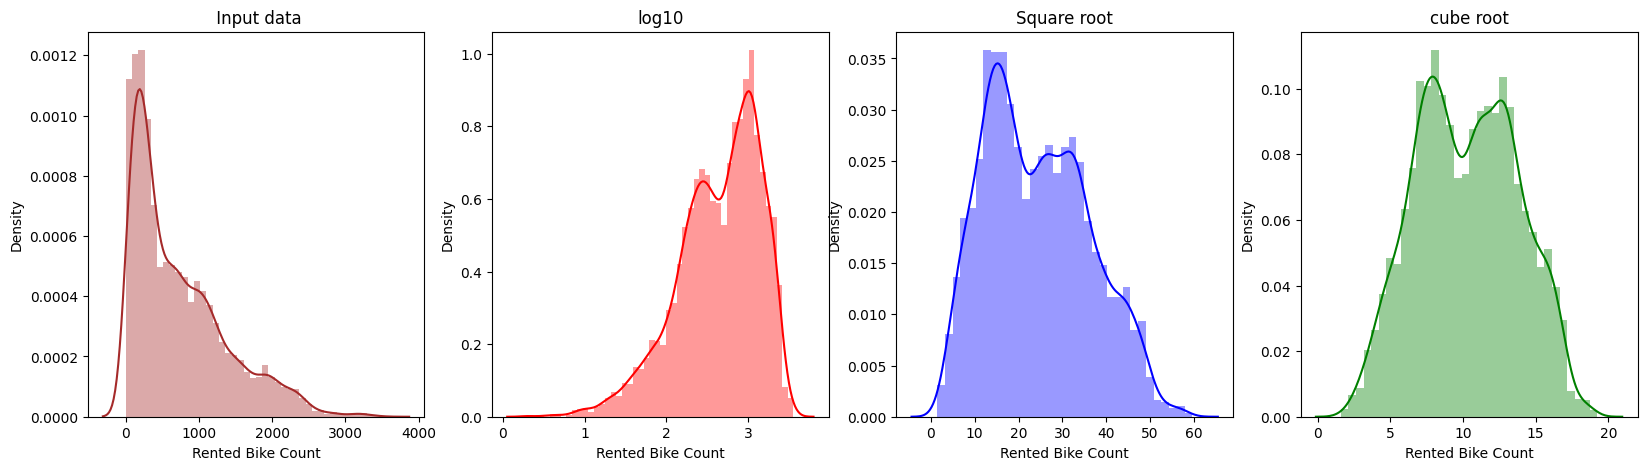

In [58]:
transform('Rented Bike Count')

* Square Root transformation is giving the best results for dependent variable y.

In [59]:
y=np.sqrt(y)

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

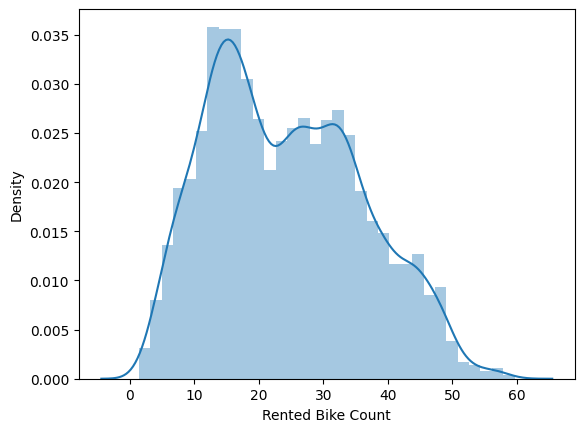

In [60]:
sns.distplot(y)

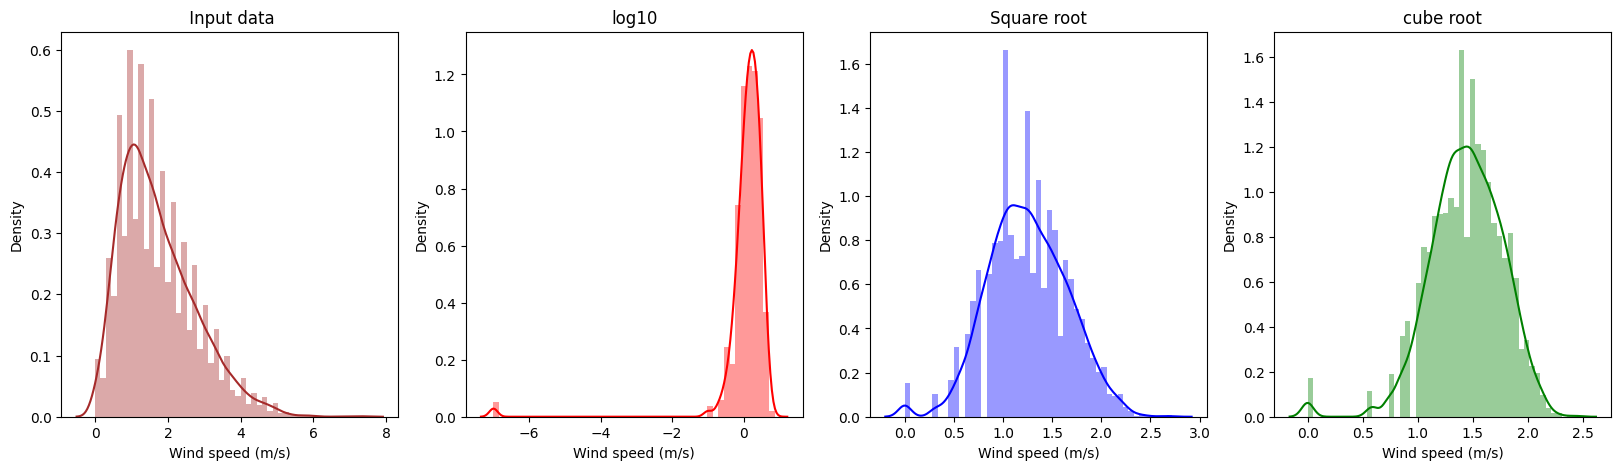

In [61]:
transform('Wind speed (m/s)')

* Square root is giving good result for wind speed.

In [62]:
X['Wind speed (m/s)']=np.sqrt(X['Wind speed (m/s)'])

<Axes: xlabel='Wind speed (m/s)', ylabel='Density'>

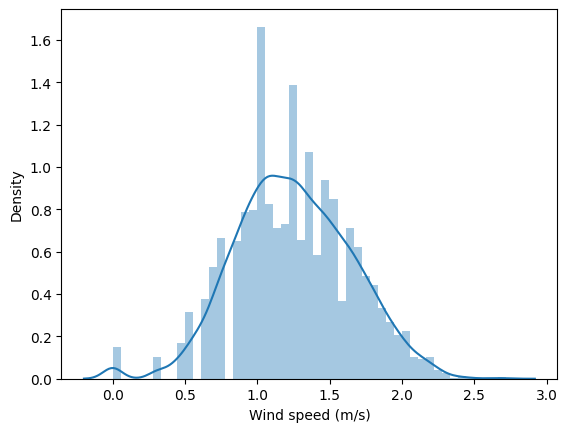

In [63]:
sns.distplot(X['Wind speed (m/s)'])

### 6. Data Splitting

In [64]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(f'Shape:\nX_train = {X_train.shape}, X_test = {X_test.shape}')
print(f'y_train = {y_train.shape}, y_test = {y_test.shape}')

Shape:
X_train = (6772, 14), X_test = (1693, 14)
y_train = (6772,), y_test = (1693,)


##### What data splitting ratio have you used and why? 

I have used a 80:20 train test split because it is the most used split for moderate data size.

### 7. Data Scaling

In [65]:
# Scaling your data
scaler=RobustScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

##### Which method have you used to scale you data and why?

* I have used the Robust Scaler to scale our data because it scales features using statistics that are robust to outliers.

### 8. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, dimensionality reduction is not needed here as it is generally used with large datasets with large no. of features and I have got only 14 input features, so even if I do dimensionality reduction here it would not have any significant impact on model performance.

## ***7. ML Model Implementation***

### Functions Used

In [66]:
# making a function to train and evaluate linear model
def train_model(model,X_train,X_test):

  #training the model
  model.fit(X_train,y_train)

  #predicting the values
  y_train_pred=model.predict(X_train)
  y_pred = model.predict(X_test)

  print('Evalution Metrics:\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test,y_pred)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2_train = r2_score(y_train,y_train_pred)
  r2 = r2_score(y_test,y_pred)
  print("R2 Train :" ,r2_train,"\nR2 Test :",r2)

  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print(f"Test Adjusted R2 : {adj_r2}\n")

  plt.figure(figsize=(10,5))
  plt.plot((y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Evaluation Graph')
  plt.show()

In [67]:
# Creating a list to store best estimators of each model for later comparsion
best_models=[]

### ML Model - 1 Linear Regression

Evalution Metrics:

MSE : 50.753070815005756
RMSE : 7.124118950088197
R2 Train : 0.6157980072439193 
R2 Test : 0.6233623212936916
Test Adjusted R2 : 0.6202199330327332



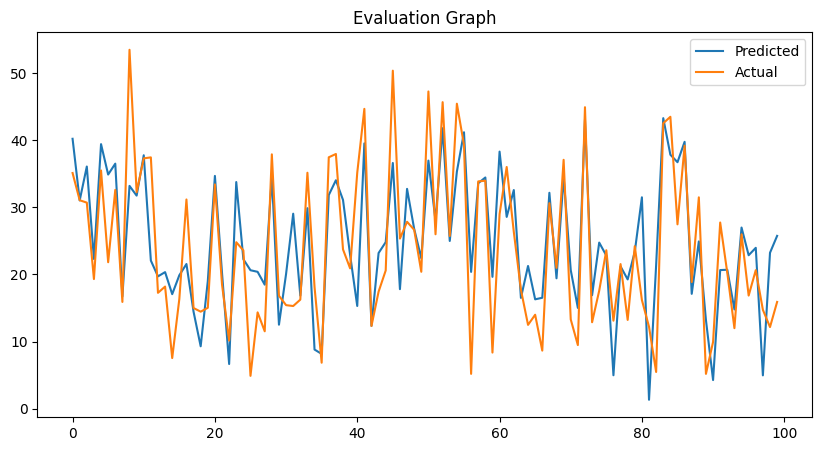

In [68]:
# ML Model - 1 Implementation
lr=LinearRegression()
# Fit the Algorithm
train_model(lr,X_train_scaled,X_test_scaled)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Simple Linear Regression also known as Ordinary least squares Linear Regression is implemented here and the evaluation metrics are as follows:
* MSE : 50.753070815005756
* RMSE : 7.124118950088197
* R2 Train : 0.6157980072439193 
* R2 Test : 0.6233623212936916
* Test Adjusted R2 : 0.6202199330327332

Seeing these metrics we can say that the model is not performing very well. It demonstrates a moderate level of performance with an R2 value of 0.623, indicating that approximately 62.3% of the variance in the bike rental counts can be explained by the predictors included in the model.

#### 2. Cross- Validation & Hyperparameter Tuning

In [69]:
# Calculating cross validation score using r2 as scoring
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Cross_validation Scores : {scores}\nAvg. R2 Score = {np.mean(scores)}")

Cross_validation Scores : [0.6295228  0.57472059 0.61150644 0.61696569 0.62950253]
Avg. R2 Score = 0.6124436098805812


In [70]:
best_models.append(['Linear Regression',lr])

##### Which hyperparameter optimization technique have you used and why?

* The model is just a simple linear regression so no hyperparameter tuning is done here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* We are getting an avg. R2 score of 0.6124 which is better than before.

### ML Model - 2 Polynomial Regression

Evalution Metrics:

MSE : 36.833808891684804
RMSE : 6.069086330880852
R2 Train : 0.7395962306021513 
R2 Test : 0.726656928219322
Test Adjusted R2 : 0.7243763543188873



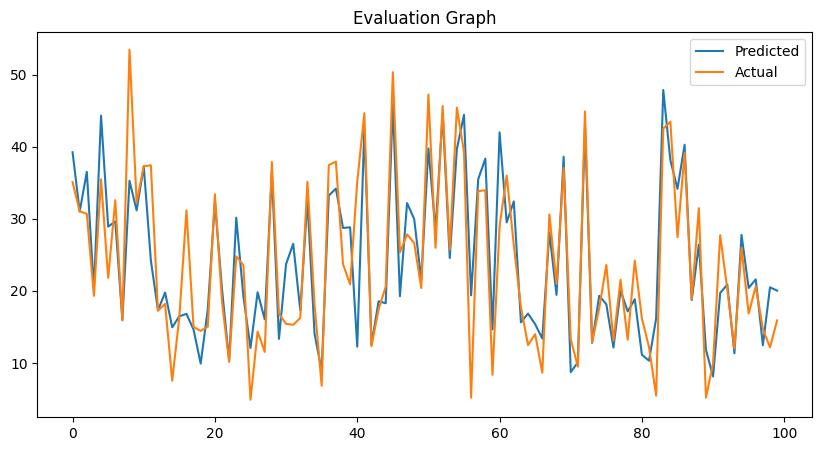

In [71]:
# ML Model - 1 Implementation
# Implementing pipeline to first convert features into polynomial features
pipe=Pipeline([
    ('Polynomial Transformation',PolynomialFeatures(degree=2)),
    ('Linear Regression',LinearRegression())
    ])
# Fit the Algorithm
train_model(pipe,X_train_scaled,X_test_scaled)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

 The polynomial regression model with degree 2 demonstrates improved performance compared to the previous model. The lower MSE and RMSE values suggest better predictive accuracy, while the higher R2 value indicates a stronger relationship between the predictors and the bike rental counts.

#### 2. Cross- Validation & Hyperparameter Tuning

In [72]:
# Calculating cross validation score using r2 as scoring
scores=cross_val_score(pipe, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Cross_validation Scores : {scores}\nAvg. R2 Score = {np.mean(scores)}")

Cross_validation Scores : [0.74528744 0.54387569 0.71664893 0.73508288 0.71944791]
Avg. R2 Score = 0.6920685696437848


In [73]:
best_models.append(['Polynomial Regression',pipe])

##### Which hyperparameter optimization technique have you used and why?

* The model is just a simple linear regression so no hyperparameter tuning is done here instead I have calculated cross validation score, a simple cross validation technique to prevent over-fitting and promote model generalisation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* No improvement is done here we are just getting a generalized R2 score for different folds of data.

### ML Model - 3 Lasso Regression

Evalution Metrics:

MSE : 62.73321592606314
RMSE : 7.920430286674023
R2 Train : 0.5186143490380756 
R2 Test : 0.5344578673811353
Test Adjusted R2 : 0.5305737256310374



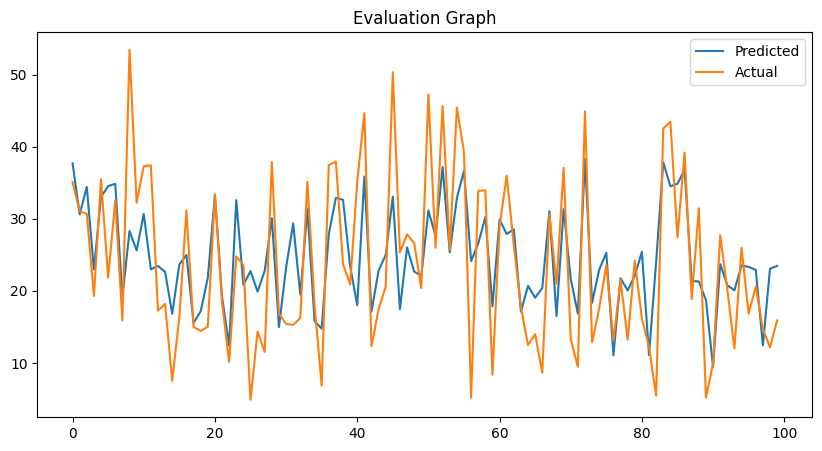

In [74]:
# ML Model - 3 Implementation
lasso = Lasso()
# Fit the Algorithm
train_model(lasso,X_train_scaled,X_test_scaled)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Lasso Regression is implemented here and observing the evaluation metrics we can't see any improvements.

#### 2. Cross- Validation & Hyperparameter Tuning

Evalution Metrics:

MSE : 50.75200960413373
RMSE : 7.1240444695505465
R2 Train : 0.6157970118850982 
R2 Test : 0.6233701965215948
Test Adjusted R2 : 0.6202278739657558



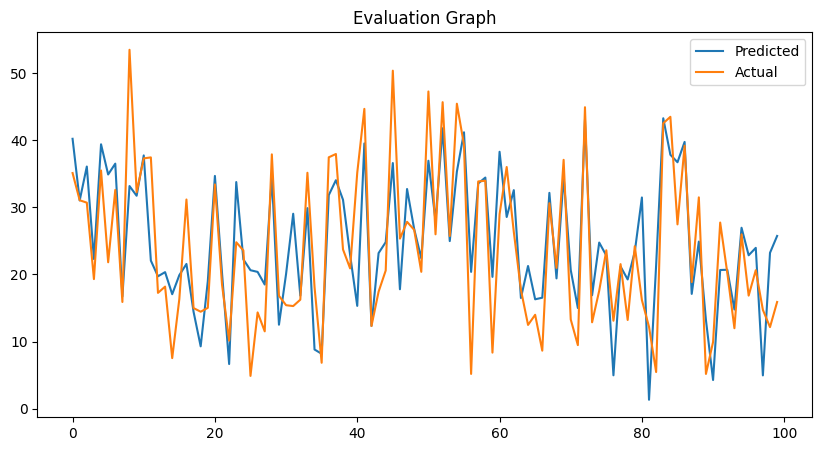

In [75]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
# Fit the Algorithm
lasso_grid = GridSearchCV(lasso, param_grid, scoring='r2', cv=5)
train_model(lasso_grid,X_train_scaled,X_test_scaled)

In [76]:
lasso_grid.best_params_

{'alpha': 0.001}

In [77]:
best_lasso=lasso_grid.best_estimator_

In [78]:
# Calculating cross validation score using r2 as scoring
scores=cross_val_score(best_lasso, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Cross_validation Scores : {scores}\nAvg. R2 Score = {np.mean(scores)}")

Cross_validation Scores : [0.62949637 0.57478112 0.6115014  0.61697266 0.62950416]
Avg. R2 Score = 0.6124511436731945


In [79]:
best_models.append(['Lasso Regression',best_lasso])

##### Which hyperparameter optimization technique have you used and why?

* I have used grid search cross validation here to try different values of alpha (tuning parameter) with lasso model and choose the one which gives best results.

* The best value of alpha was found to be 0.001, so I also calculated avg. cross val score to validate r2 score and got avg. r2 score of 0.61245.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, we can see significant improvements as compared to previous lasso model (without hyperparameter tuning) as r2 score went up from 0.53 to 0.62 which was then also validated using cross validation score and also there is decrease in MSE and RMSE values.

### ML Model - 4 Ridge Regression

Evalution Metrics:

MSE : 50.75294014119787
RMSE : 7.124109778856434
R2 Train : 0.6157976614877436 
R2 Test : 0.6233632910218062
Test Adjusted R2 : 0.6202209108515471



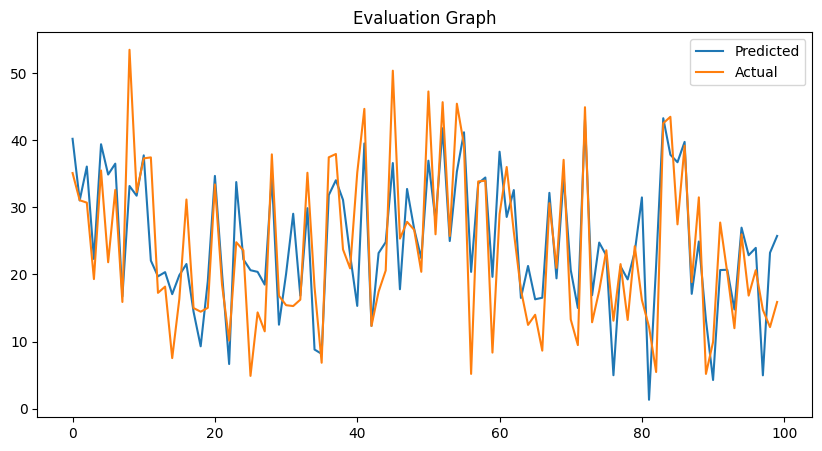

In [80]:
# ML Model - 4 Implementation
ridge = Ridge()
# Fit the Algorithm
train_model(ridge,X_train_scaled,X_test_scaled)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Ridge Regression is implemented here and observing the evaluation metrics we can't see any improvements.

#### 2. Cross- Validation & Hyperparameter Tuning

Evalution Metrics:

MSE : 50.75328559967476
RMSE : 7.1241340245446505
R2 Train : 0.6157895312070013 
R2 Test : 0.6233607273803017
Test Adjusted R2 : 0.6202183258209001



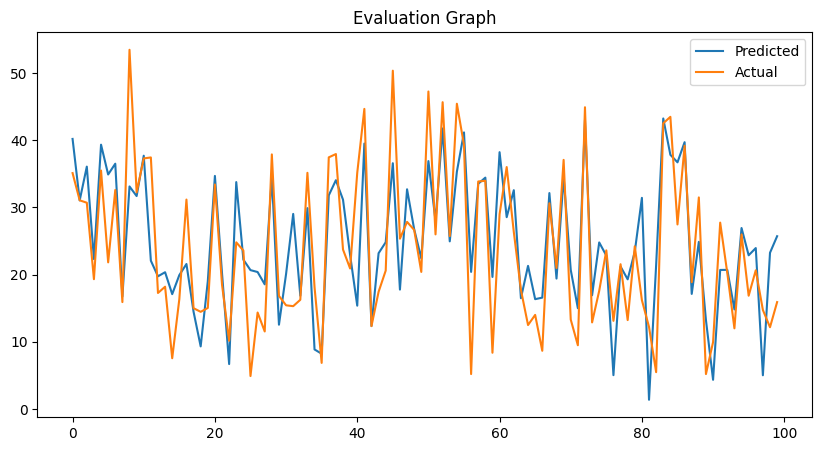

In [81]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
# Fit the Algorithm
ridge_grid = GridSearchCV(ridge, param_grid, scoring='r2', cv=5)
train_model(ridge_grid,X_train_scaled,X_test_scaled)

In [82]:
ridge_grid.best_params_

{'alpha': 5}

In [83]:
# Validating r2 score using cross_validation
best_ridge= ridge_grid.best_estimator_
scores=cross_val_score(best_ridge, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Cross_validation Scores : {scores}\nAvg. R2 Score = {np.mean(scores)}")

Cross_validation Scores : [0.62948334 0.57492897 0.61156474 0.61686796 0.62943375]
Avg. R2 Score = 0.6124557505723311


In [84]:
best_models.append(['Ridge Regression',best_ridge])

##### Which hyperparameter optimization technique have you used and why?

Again I have used grid search cross validation here to try different values of alpha (tuning parameter) with ridge model and choose the one which gives best results.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, I can't see any significant improvements this time, the scores are almost similar to other linear algorithms.

### ML Model - 5 Voting Ensemble Regressor

In [85]:
estimators=[('Linear Regression',lr),('Polynomial Regression',pipe),('Lasso Regression',best_lasso),('Ridge Regression',best_ridge)]

In [86]:
for estimator in estimators:
  scores= cross_val_score(estimator[1],X_train_scaled,y_train,scoring='r2',cv=5)
  print(estimator[0],np.round(np.mean(scores),2))

Linear Regression 0.61
Polynomial Regression 0.69
Lasso Regression 0.61
Ridge Regression 0.61


Evalution Metrics:

MSE : 43.741061285989225
RMSE : 6.613702539878039
R2 Train : 0.6699588057359531 
R2 Test : 0.6753983252175066
Test Adjusted R2 : 0.6726900871680699



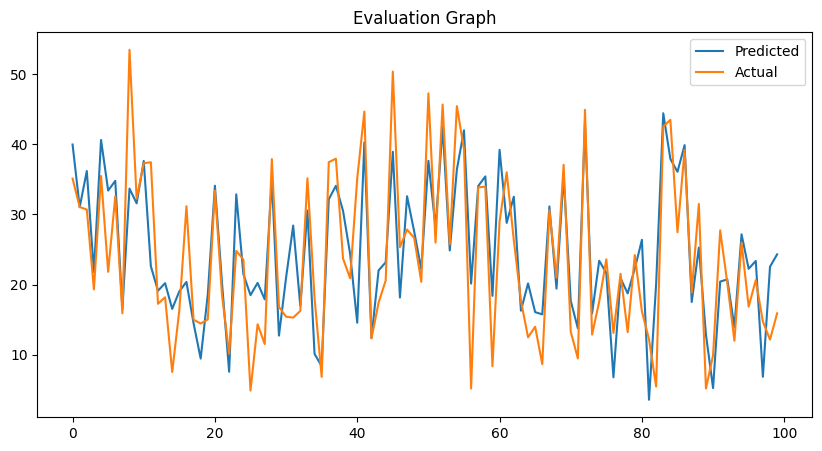

In [87]:
# ML Model - 4 Implementation
vr=VotingRegressor(estimators)
# Fit the Algorithm
train_model(vr,X_train_scaled,X_test_scaled)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I have used Voting Ensemble Regressor here using models 1, 2, 3 and 4 as its estimators, but unfortunatly it is giving same results.

#### 2. Cross- Validation & Hyperparameter Tuning

In [88]:
# running a nested noop to find best weights for Voting Regressor
w1,w2,w3,w4,score=0,0,0,0,0.6
for i in range(1,4):
  for j in range(1,4):
    for k in range(1,4):
      for l in range(1,4):
        vr=VotingRegressor(estimators=estimators,weights=[i,j,k,l])
        x=np.round(np.mean(cross_val_score(vr,X_train_scaled,y_train,cv=10,scoring='r2')),2)
        if x>score:
          score=x
          w1,w2,w3,w4=i,j,k,l
print("Best R2 score= {} when weights w1={}, w2={}, w3={}, w4={}".format(score,w1,w2,w3,w4))

Best R2 score= 0.7 when weights w1=1, w2=3, w3=1, w4=1


In [89]:
# Validating r2 score using cross_validation
best_vr= VotingRegressor(estimators=estimators,weights=[1,3,1,1])
scores=cross_val_score(best_vr, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Cross_validation Scores : {scores}\nAvg. R2 Score = {np.mean(scores)}")

Cross_validation Scores : [0.72021572 0.67428265 0.69147536 0.70619116 0.7093034 ]
Avg. R2 Score = 0.700293658654497


In [90]:
best_models.append(['Voting Regressor',best_vr])

##### Which hyperparameter optimization technique have you used and why?

This time for finding weights for different estimators of voting ensemble I have run a loop which gives the best possible weightage ratio for each estimator, for best results from our voting regressor.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, Voting regressor is performing better than all its estimator models.

### **As I was not seeing any significant improvements by using linear models so I tried implementing tree based and other non-linear models.**

### ML Model - 6 Decision Tree Regressor

Evalution Metrics:

MSE : 25.882193329337618
RMSE : 5.087454503908376
R2 Train : 1.0 
R2 Test : 0.8079286817753016
Test Adjusted R2 : 0.8063261797162159



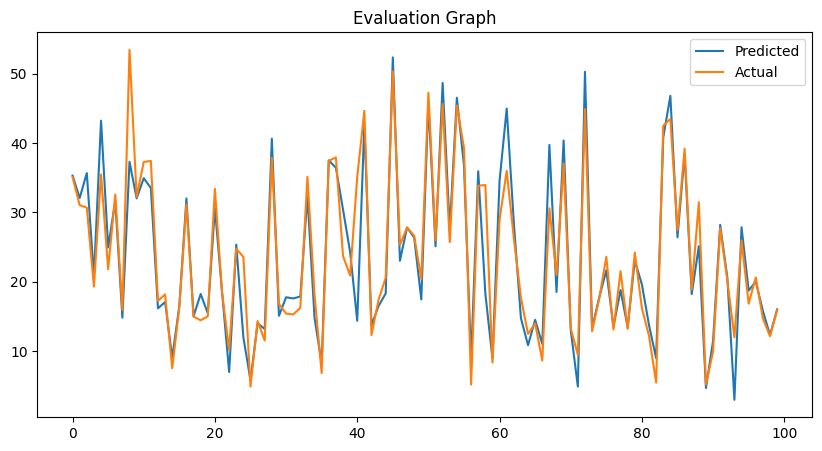

In [91]:
# ML Model - 6 Implementation
dt= DecisionTreeRegressor()
# Fit the Algorithm
train_model(dt,X_train,X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

* A simple Decision Tree Regressor with default parameters is used here, and it's showing better results than all linear algorithms.

* So far the best results were given by Polynomial Regression with an avg. r2 score of 0.69 and Decision Tree regressor even without doing hyperparameter tuning is giving an r2 score of 0.81 which is significantly better.

* But there is a problem here as Train R2 score is 1.0 and Test R2 score is 0.81 which means there is overfitting, so we need to do hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning

Evalution Metrics:

MSE : 24.248837169074232
RMSE : 4.924310831890512
R2 Train : 0.8415441549931644 
R2 Test : 0.8200497901697984
Test Adjusted R2 : 0.8185484177397491



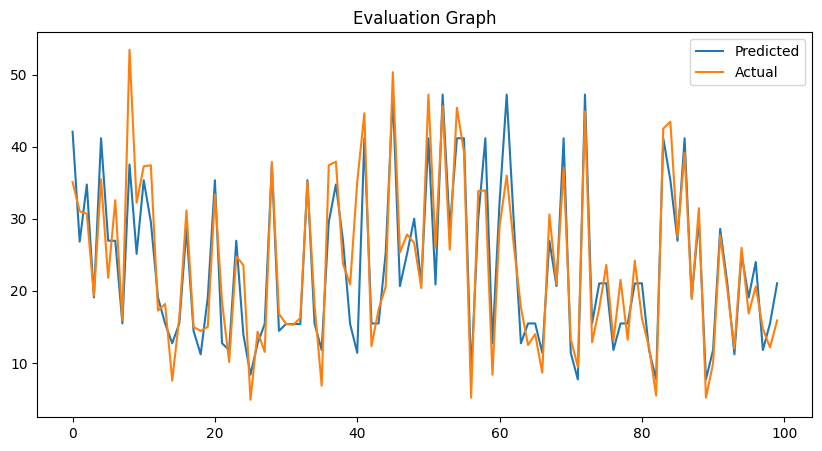

In [92]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params_grid={'min_samples_split':[2,4,8,10],'max_leaf_nodes':list(range(30,50)),'max_depth':list(range(2,20,2))}
dt_grid=GridSearchCV(DecisionTreeRegressor(),params_grid,scoring='r2',cv=5)
# Fit the Algorithm
train_model(dt_grid,X_train,X_test)

In [93]:
dt_grid.best_params_

{'max_depth': 10, 'max_leaf_nodes': 49, 'min_samples_split': 2}

In [94]:
best_dt=dt_grid.best_estimator_

In [95]:
# Validating r2 score using cross_validation
scores=cross_val_score(best_dt, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Cross_validation Scores : {scores}\nAvg. R2 Score = {np.mean(scores)}")

Cross_validation Scores : [0.83068984 0.79910764 0.79723354 0.82332943 0.82922461]
Avg. R2 Score = 0.8159170112335905


In [96]:
best_models.append(['Decision Tree Regressor',best_dt])

##### Which hyperparameter optimization technique have you used and why?

We have again used grid search cross validation to find best parameters and then we have also used cross_val_score for validation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, before without hyperparameter tuning Decision Tree was overfitting, but now that problem is solved and we are getting even better scores.

### ML Model - 7 Random Forest Regressor

Evalution Metrics:

MSE : 13.341934872248835
RMSE : 3.6526613410291455
R2 Train : 0.9874399886307443 
R2 Test : 0.9009897273398317
Test Adjusted R2 : 0.9001636583188292



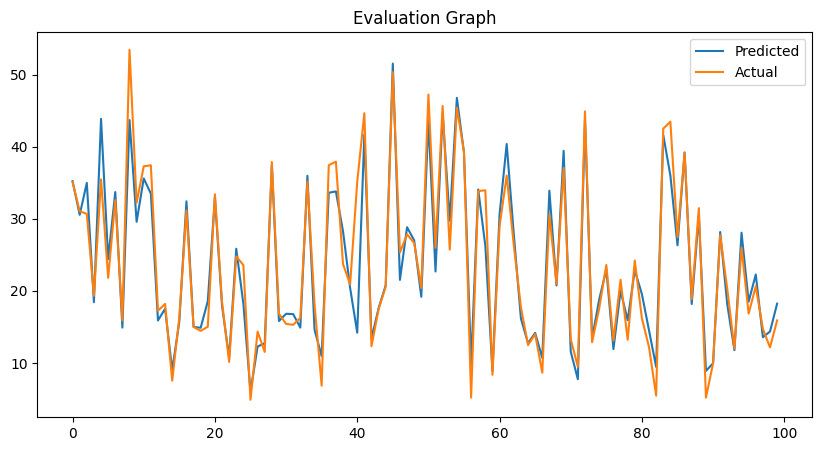

In [97]:
# ML Model - 7 Implementation
rf= RandomForestRegressor()
# Fit the Algorithm
train_model(rf,X_train_scaled,X_test_scaled)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

* A Random Forest Regressor with default parameters is used here, and it is showing the best results so far.

* Previously the best r2 score we were getting was using Decision Tree Regressor and now we are getting much better results.

* But there is a problem here as Train R2 score is 0.98 and Test R2 score is 0.89 which means there might be overfitting, so we need to do hyperparameter tuning.


#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Evalution Metrics:

MSE : 14.523459582712661
RMSE : 3.810965702117071
R2 Train : 0.9449544425905656 
R2 Test : 0.8922216524797847
Test Adjusted R2 : 0.8913224290797352



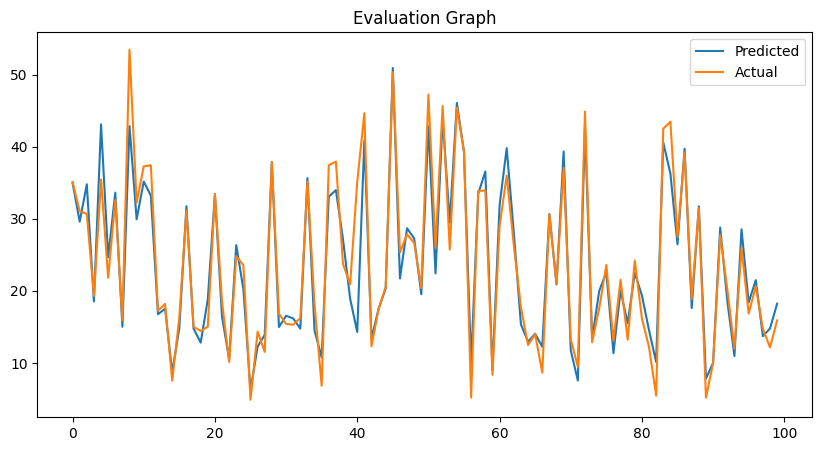

In [98]:
# ML Model - 6 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'n_estimators':[250,500], 'min_samples_leaf':[6,8]}
rf_grid=GridSearchCV(RandomForestRegressor(),param_grid,scoring='r2',cv=3, n_jobs=-1,verbose=2)
# Fit the Algorithm
train_model(rf_grid,X_train_scaled,X_test_scaled)

In [99]:
rf_grid.best_params_

{'min_samples_leaf': 6, 'n_estimators': 500}

In [100]:
best_rf=rf_grid.best_estimator_

In [101]:
# Validating r2 score using cross_validation
scores=cross_val_score(best_rf, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Cross_validation Scores : {scores}\nAvg. R2 Score = {np.mean(scores)}")

Cross_validation Scores : [0.90736048 0.88893845 0.88277818 0.89788613 0.89716759]
Avg. R2 Score = 0.8948261684138684


In [102]:
best_models.append(['Random Forest Regressor',best_rf])

##### Which hyperparameter optimization technique have you used and why?

Grid Search cross validation is used to find best parameters and then we have also used cross_val_score for validation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, before without hyperparameter tuning Random Forest was overfitting, but now that problem is solved and we are getting better scores.

### ML Model - 8 Gradient Boosting Regressor

Evalution Metrics:

MSE : 17.668924124831275
RMSE : 4.20344193784466
R2 Train : 0.8869704494754684 
R2 Test : 0.86887921340029
Test Adjusted R2 : 0.8677852378267524



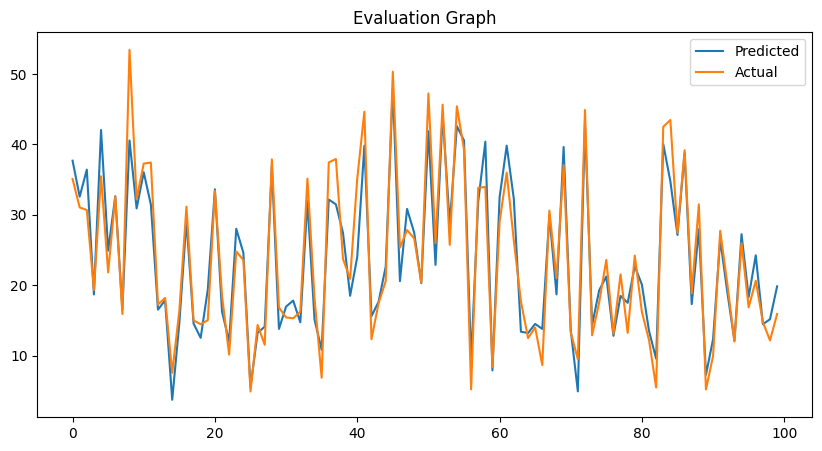

In [103]:
# ML Model - 8 Implementation
gbr= GradientBoostingRegressor()
# Fit the Algorithm
train_model(gbr,X_train_scaled,X_test_scaled)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Gradient Boosting Regressor with default parameters is used here, and it's showing good results as compared to most of the other algorithms used.


#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Evalution Metrics:

MSE : 13.99059244407273
RMSE : 3.740400037973576
R2 Train : 0.9310927599479291 
R2 Test : 0.8961760504882866
Test Adjusted R2 : 0.8953098196818718



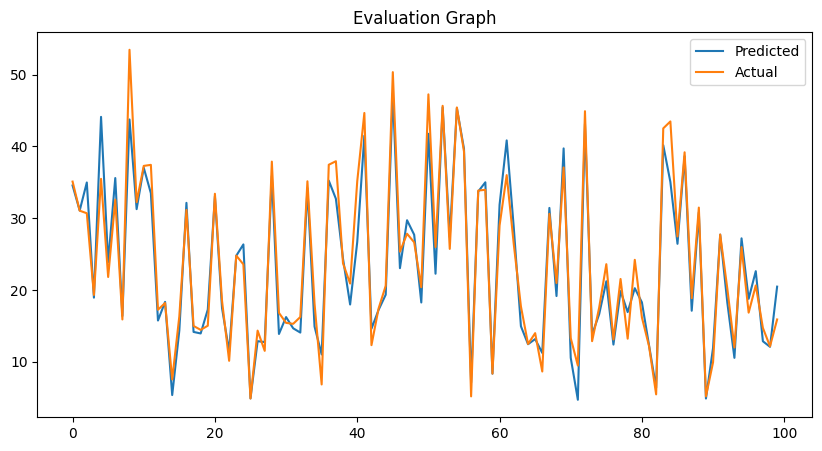

In [104]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'n_estimators':[250,500], 'min_samples_leaf':[6,8]}
gbr_grid=GridSearchCV(GradientBoostingRegressor(),param_grid,scoring='r2',cv=3,verbose=2,n_jobs=-1)
# Fit the Algorithm
train_model(gbr_grid,X_train_scaled,X_test_scaled)

In [105]:
gbr_grid.best_params_

{'min_samples_leaf': 8, 'n_estimators': 500}

In [106]:
best_gbr=gbr_grid.best_estimator_

In [107]:
# Validating r2 score using cross_validation
scores=cross_val_score(best_gbr, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Cross_validation Scores : {scores}\nAvg. R2 Score = {np.mean(scores)}")

Cross_validation Scores : [0.91341719 0.90165868 0.89730715 0.90388347 0.90156005]
Avg. R2 Score = 0.9035653054627645


In [108]:
best_models.append(['Gradient Boosting Regressor',gbr])

##### Which hyperparameter optimization technique have you used and why?

We have again used grid search cross validation to find best parameters and then we have also used cross_val_score for validation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, the model improved as it was giving 0.86 test r2 score before hyperparameter tuning and now giving 0.89.

### ML Model - 9 XGB Regressor

Evalution Metrics:

MSE : 12.677047097723134
RMSE : 3.5604841100225593
R2 Train : 0.9807461540446079 
R2 Test : 0.9059238482506697
Test Adjusted R2 : 0.9051389459118792



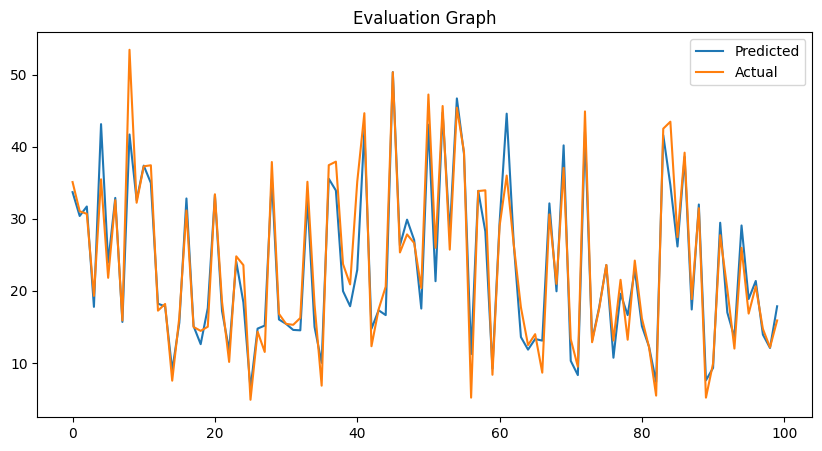

In [109]:
# ML Model - 9 Implementation
xgb= XGBRegressor()
# Fit the Algorithm
train_model(xgb,X_train_scaled,X_test_scaled)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Extreme Gradient Boosting Regressor with default parameters is used here, and it's showing better results than all other algorithms used but there is some overfitting.

#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Evalution Metrics:

MSE : 12.564970452739129
RMSE : 3.5447102071592718
R2 Train : 0.9552003311673006 
R2 Test : 0.9067555671343966
Test Adjusted R2 : 0.9059776040473178



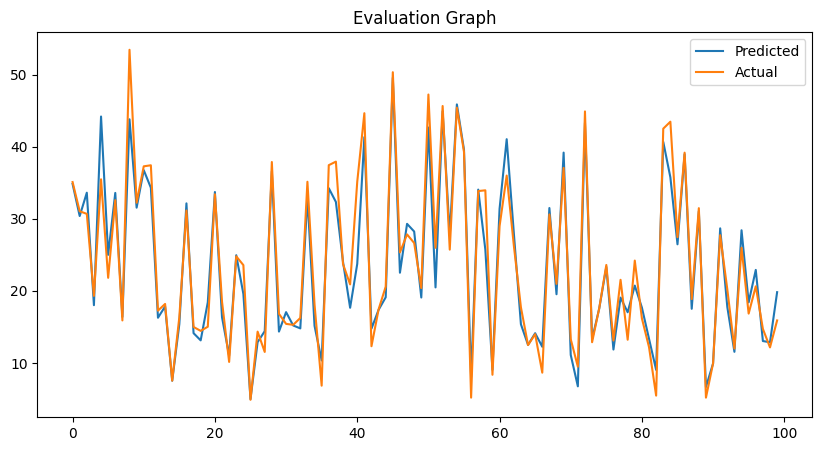

In [110]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {"max_depth":    [ 5, 6],
              "n_estimators": [500, 700],
              "learning_rate": [0.01, 0.015]}
xgb_grid=GridSearchCV(XGBRegressor(),param_grid,scoring='r2',cv=3,verbose=2,n_jobs=-1)
# Fit the Algorithm
train_model(xgb_grid,X_train_scaled,X_test_scaled)

In [111]:
xgb_grid.best_params_

{'learning_rate': 0.015, 'max_depth': 6, 'n_estimators': 700}

In [112]:
best_xgb=xgb_grid.best_estimator_

In [113]:
# Validating r2 score using cross_validation
scores=cross_val_score(best_xgb, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Cross_validation Scores : {scores}\nAvg. R2 Score = {np.mean(scores)}")

Cross_validation Scores : [0.922948   0.91517216 0.90653703 0.91695821 0.91107105]
Avg. R2 Score = 0.9145372909848319


In [114]:
best_models.append(['XGB Regressor',best_xgb])

##### Which hyperparameter optimization technique have you used and why?

I have again used grid search cross validation to find best parameters and then I have also used cross_val_score for validation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, I am getting the current best r2 score 0.90 and even better cross_val_score 0.914.

### ML Model - 10 LightGBM Regressor

Evalution Metrics:

MSE : 13.015248584383135
RMSE : 3.6076652539257483
R2 Train : 0.949822383546214 
R2 Test : 0.9034140607476644
Test Adjusted R2 : 0.9026082185846532



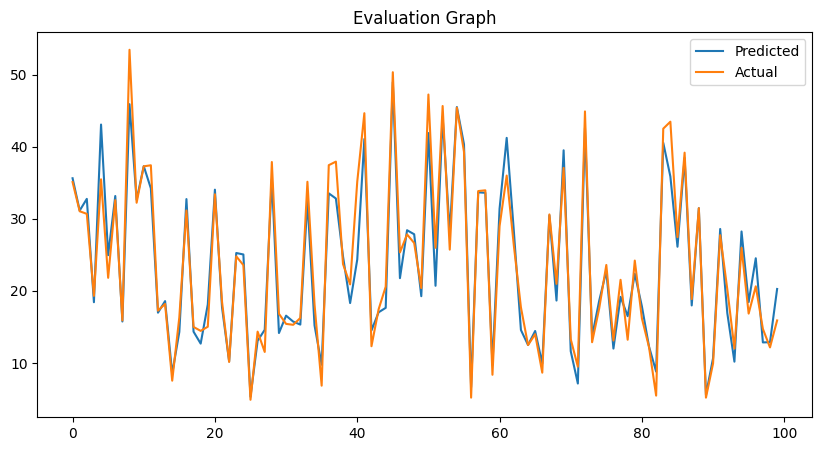

In [115]:
# ML Model - 8 Implementation
lgbmr=LGBMRegressor()
# Fit the Algorithm
train_model(lgbmr,X_train_scaled,X_test_scaled)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Light Gradient Boosting Model with default parameters is used here, and it's showing really good results.


#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Evalution Metrics:

MSE : 12.552418067229537
RMSE : 3.5429391848053977
R2 Train : 0.9564833747941749 
R2 Test : 0.9068487181746123
Test Adjusted R2 : 0.9060715322714208



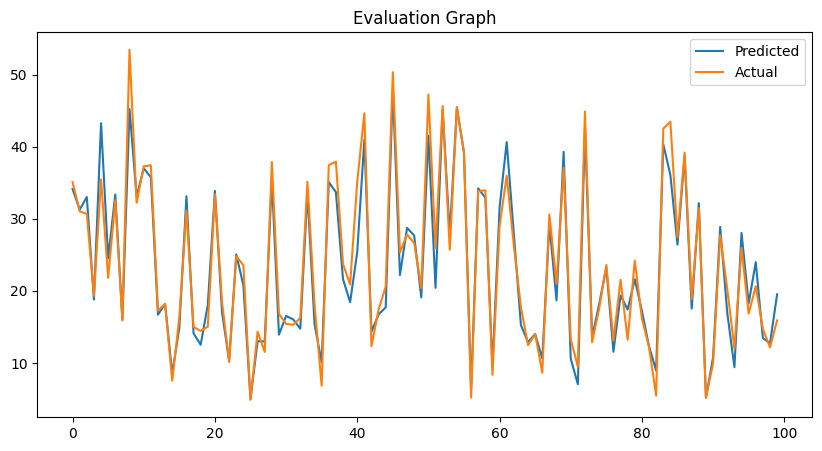

In [116]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {"max_depth":    [6,8],
              "n_estimators": [500,1000],
              "learning_rate": [0.01, 0.015]}
lgb_grid=GridSearchCV(LGBMRegressor(),param_grid,scoring='neg_mean_squared_error',cv=3,verbose=2,n_jobs=-1)
# Fit the Algorithm
train_model(lgb_grid,X_train_scaled,X_test_scaled)

In [117]:
lgb_grid.best_params_

{'learning_rate': 0.015, 'max_depth': 8, 'n_estimators': 1000}

In [118]:
best_lgb=lgb_grid.best_estimator_

In [119]:
# Validating r2 score using cross_validation
scores=cross_val_score(best_lgb, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Cross_validation Scores : {scores}\nAvg. R2 Score = {np.mean(scores)}")

Cross_validation Scores : [0.92476926 0.91739948 0.91214838 0.920266   0.91561602]
Avg. R2 Score = 0.9180398285238066


In [120]:
best_models.append(['LightGBM Regressor',best_lgb])

##### Which hyperparameter optimization technique have you used and why?

We have again used grid search cross validation to find best parameters and then we have also used cross_val_score for validation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


Yes, this is the best r2 score (0.906) I am getting and even better cross_val_score 0.918.

### Models Comparison

In [121]:
# List containing all model names and their best estimators
best_models

[['Linear Regression', LinearRegression()],
 ['Polynomial Regression',
  Pipeline(steps=[('Polynomial Transformation', PolynomialFeatures()),
                  ('Linear Regression', LinearRegression())])],
 ['Lasso Regression', Lasso(alpha=0.001)],
 ['Ridge Regression', Ridge(alpha=5)],
 ['Voting Regressor',
  VotingRegressor(estimators=[('Linear Regression', LinearRegression()),
                              ('Polynomial Regression',
                               Pipeline(steps=[('Polynomial Transformation',
                                                PolynomialFeatures()),
                                               ('Linear Regression',
                                                LinearRegression())])),
                              ('Lasso Regression', Lasso(alpha=0.001)),
                              ('Ridge Regression', Ridge(alpha=5))],
                  weights=[1, 3, 1, 1])],
 ['Decision Tree Regressor',
  DecisionTreeRegressor(max_depth=10, max_leaf_nodes=49)],
 

In [122]:
import time
model_data = []
for name,model in best_models :
    curr_model_data = {}
    model.random_state = 42
    curr_model_data["Name"] = name
    start = time.time()
    model.fit(X_train_scaled,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Test_RMSE_Score"] = np.round(mean_squared_error(y_test,model.predict(X_test_scaled),squared=False),3)
    curr_model_data["Train_R2_Score"] = np.round(r2_score(y_train,model.predict(X_train_scaled)),3)
    curr_model_data["Test_R2_Score"] = np.round(r2_score(y_test,model.predict(X_test_scaled)),3)
    curr_model_data["Cross_val_score (r2)"] = np.round(np.mean(cross_val_score(model,X_train_scaled,y_train,scoring='r2',cv=5)),3)
    model_data.append(curr_model_data)

In [123]:
model_df=pd.DataFrame(model_data)
model_df

Name  Train_Time  Test_RMSE_Score  Train_R2_Score  \
0            Linear Regression    0.010067            7.124           0.616   
1        Polynomial Regression    0.180313            6.069           0.740   
2             Lasso Regression    0.030495            7.124           0.616   
3             Ridge Regression    0.011159            7.124           0.616   
4             Voting Regressor    0.232923            6.252           0.709   
5      Decision Tree Regressor    0.098808            4.924           0.842   
6      Random Forest Regressor   11.815327            3.812           0.945   
7  Gradient Boosting Regressor    0.955255            4.203           0.887   
8                XGB Regressor    8.290874            3.545           0.955   
9           LightGBM Regressor    1.307765            3.543           0.956   

   Test_R2_Score  Cross_val_score (r2)  
0          0.623                 0.612  
1          0.727                 0.692  
2          0.623                 0.612  
3          0.623                 0.612  
4          0.710                 0.700  
5          0.820                 0.816  
6          0.892                 0.895  
7          0.869                 0.876  
8          0.907                 0.915  
9          0.907                 0.918

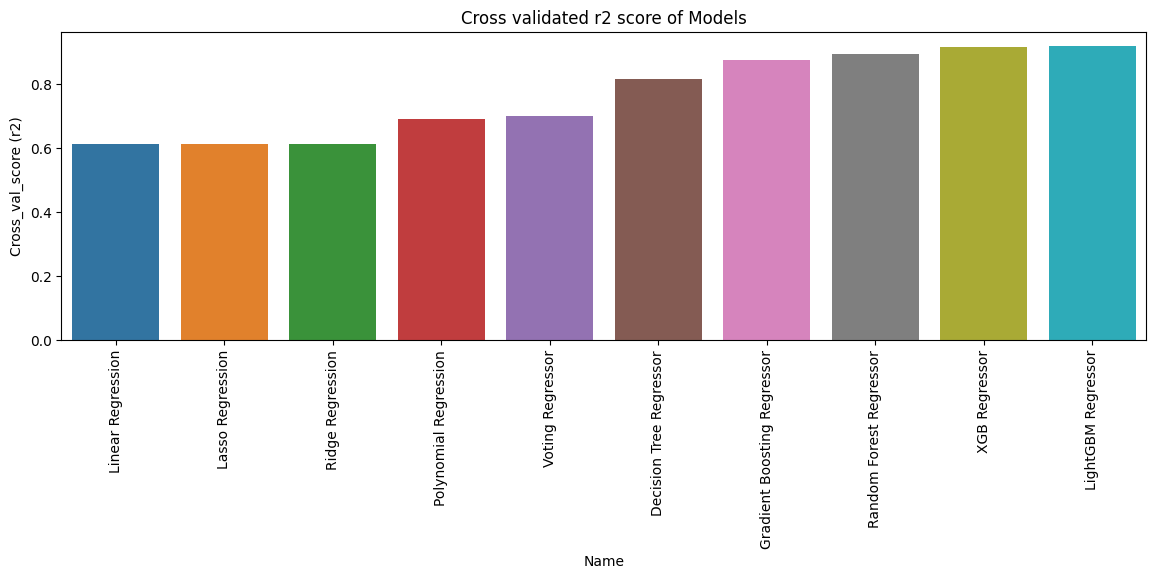

In [124]:
# plotting cross validation r2 scores for all models
plt.figure(figsize=(14,4))
sns.barplot(x='Name',y='Cross_val_score (r2)',data=model_df.sort_values('Cross_val_score (r2)')).set(title='Cross validated r2 score of Models')
plt.xticks(rotation=90);

### 1. Which ML model did you choose from the above created models as your final prediction model and why?

The ML model I choose from the above created models as the final prediction model was LightGBM Regressor as it has the best scores out of all the models and also its training time is less than other boosting models.

### 2. Explain the model which you have used and the feature importance using any model explainability tool?

**Feature Importance using SHAP**

In [125]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.3 MB/s eta 0:00:00


In [126]:
import shap 

In [127]:
best_lgb.fit(X_train,y_train)

LGBMRegressor(learning_rate=0.015, max_depth=8, n_estimators=1000,
              random_state=42)

In [128]:
np.mean(cross_val_score(best_lgb,X_train,y_train,scoring='r2',cv=5))

0.9182758889819048

In [129]:
X_train.loc[3000]

Hour                          0.00000
Temperature(°C)               9.50000
Humidity(%)                  61.00000
Wind speed (m/s)              1.30384
Visibility (10m)           2000.00000
Solar Radiation (MJ/m2)       0.00000
Rainfall(mm)                  0.00000
Snowfall (cm)                 0.00000
Holiday                       0.00000
Month                         5.00000
is_weekend                    0.00000
Seasons_Spring                1.00000
Seasons_Summer                0.00000
Seasons_Winter                0.00000
Name: 3000, dtype: float64

In [130]:
y_train.loc[3000]

20.8806130178211

In [131]:
shap.initjs()
explainer = shap.TreeExplainer(best_lgb)
shap_values = explainer.shap_values(X_train)
i = 3000
shap.force_plot(explainer.expected_value, shap_values[i], features=X_train.loc[3000], feature_names=X_train.columns)

* In blue, we have negative Shap values that show everything that pushes the  value in the negative direction. While the Shap value in red represents everything that pushes it towards a positive direction for observation number 3000.

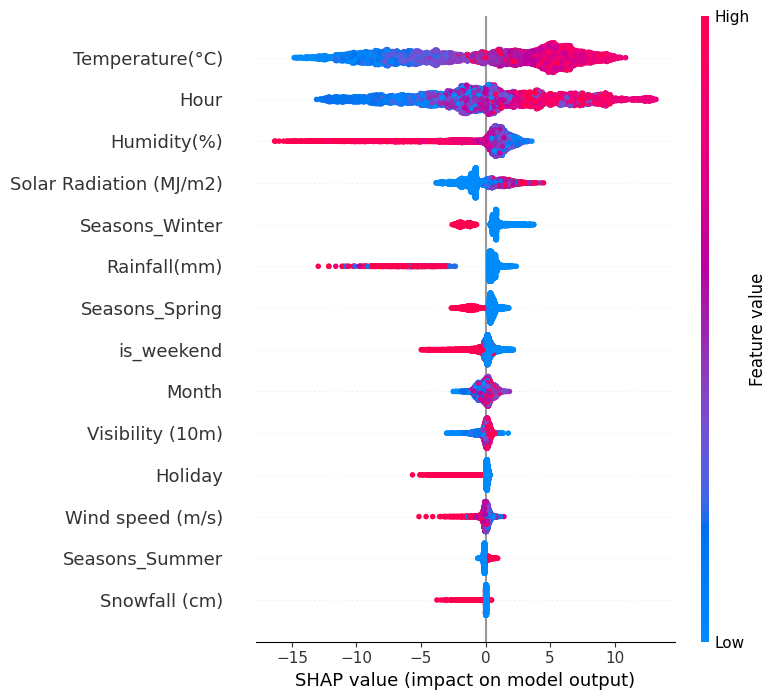

In [132]:
# Global Interpretation using Shapley values
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

* Here, all the values on the left represent the observations that shift the predicted value in the negative direction while the points on the right contribute to shifting the prediction in a positive direction.

* So here, high Temperature and Hour values are mostly on the right side primarily because they contribute positively to the target value. Similarly, Humidity, Rainfall, etc. have a high impact on pushing the target value in the negative direction.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [133]:
# Save the File
import pickle
pickle.dump(best_lgb,open('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Capstone Project Regression/best_lgb.pkl','wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [134]:
# Load the File and predict unseen data.
regressor=pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Capstone Project Regression/best_lgb.pkl','rb'))

In [135]:
X_test.iloc[0:2]

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
5993    17             35.6           44          1.549193              1860   
5340    12             28.1           73          1.449138              1326   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Holiday  Month  \
5993                     1.69           0.0            0.0        0      7   
5340                     0.87           0.0            0.0        0     11   

      is_weekend  Seasons_Spring  Seasons_Summer  Seasons_Winter  
5993           1               0               1               0  
5340           0               0               1               0

In [136]:
y_test.head(2)

5993    35.099858
5340    31.048349
Name: Rented Bike Count, dtype: float64

In [137]:
regressor.predict(X_test.iloc[0:2])

array([34.14318888, 31.26444344])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

* In conclusion, the bike rental prediction project aimed to develop an accurate model for predicting bike rental counts. After evaluating various models, the final model selected was LightGBM, which achieved a cross-validation R-squared score of 0.918.

* By utilizing the LightGBM model and the insights found from EDA, bike rental businesses can make more accurate predictions and forecasts, enabling them to optimize their operations, resource allocation, and decision-making processes. This improved accuracy can lead to positive business impacts such as better inventory management, staffing optimization, and enhanced customer satisfaction.

* Overall, the successful implementation of the LightGBM model with a high cross-validation R-squared score of 0.918 signifies the project's effectiveness in providing an accurate and reliable tool for bike rental count predictions, contributing to improved business outcomes.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***